In [173]:
## Import dependencies
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns 

import pickle


%matplotlib inline

from sklearn.decomposition import SparsePCA
from sklearn.manifold import TSNE
import umap

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EllipticEnvelope
from scipy import stats

from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import PCA

## Importing and Exploring Data

In [ ]:
## Importing data set, it's a big one
data = pd.read_csv("Amazon_reviews.csv")

data.shape

In [4]:
data.head()


####hmmmmmm, we need to add column names to it. There aren't any in the original dataset

3                     more like funchuck  \
0  5                              Inspiring   
1  5  The best soundtrack ever to anything.   
2  4                       Chrono Cross OST   
3  5                    Too good to be true   
4  5         There's a reason for the price   

  Gave this to my dad for a gag gift after directing "Nunsense," he got a reall kick out of it!  
0  I hope a lot of people hear this cd. We need m...                                             
1  I'm reading a lot of reviews saying that this ...                                             
2  The music of Yasunori Misuda is without questi...                                             
3  Probably the greatest soundtrack in history! U...                                             
4  There's a reason this CD is so expensive, even...

In [2]:
## Re-import the data set with column names
colnames = ['Review_Class', 'Title', 'Description']

data = pd.read_csv("Amazon_reviews.csv", header = None, names = colnames)

In [3]:
## There, that looks much better

print(data.shape)

data.head()

(3000000, 3)


Review_Class                                  Title  \
0             3                     more like funchuck   
1             5                              Inspiring   
2             5  The best soundtrack ever to anything.   
3             4                       Chrono Cross OST   
4             5                    Too good to be true   

                                         Description  
0  Gave this to my dad for a gag gift after direc...  
1  I hope a lot of people hear this cd. We need m...  
2  I'm reading a lot of reviews saying that this ...  
3  The music of Yasunori Misuda is without questi...  
4  Probably the greatest soundtrack in history! U...

In [7]:
##Creating a list of the descriptions for text pre-processing

reviews = data['Description'].tolist()

In [8]:
## Checking length of reviews, we have 3,000,000 rows converted to a list
len(reviews)

3000000

In [9]:
## Some samples of what's in the the reviews list
reviews[0:2]

['Gave this to my dad for a gag gift after directing "Nunsense," he got a reall kick out of it!',
 'I hope a lot of people hear this cd. We need more strong and positive vibes like this. Great vocals, fresh tunes, cross-cultural happiness. Her blues is from the gut. The pop sounds are catchy and mature.']

## Pre-processing the data before creating a DTM

In [28]:
## Importing nltk dependecies
## I don't know if I'll need them all, but at least they'll be there
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from nltk import wordpunct_tokenize

In [29]:
## Setting up stop words and Porter Stemmer
en_stop = stopwords.words('english')

en_stop.extend([".","-","(", ")","/", ",", "’", "”","“", "\n", "'", "!"])

en_stop.extend([";", ".(", ",(", "?", "?)", "),", ")."])

## One last stop word extension
en_stop.extend(['#', '$', '%', '&', "''", "'d", "'ll", "'m", "'re", "'s", "'the", "'ve", '*', '+', '--', '..', '...', '.i',
                '.it', '.the', '0', '1', '1.', '1/2', '1/4', '10', '100', '11', '12', '13', '14', '15', '16', '17', '18', 
                '1980', '1st', '2', '2-3', '2.', '20', '200', '2000', '2003', '2005', '24', '25', '2nd', '3', '3.', '30', 
                '300', '35', '3d', '3rd', '4', '40', '45', '4th', '5', '50', '500', '6', '60', '7', '70', '8', '80', '9', 
                '90', ':', '<', '=', '>', '@', '[', ']', '`', '``'])

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()


In [12]:
print(len(en_stop)) ## There are 179 stop words in the English default

en_stop

277


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [283]:
## creating a large sample since the whole data set makes my computer very angry
sampledata = data.sample(n = 100000, random_state = 1222)

sampledata.shape

(100000, 3)

In [284]:
## Setting aside classification labels/truths for later in train/text
sample_y = sampledata['Review_Class'].tolist()

len(sample_y)

y = pd.DataFrame({'Class': sample_y})
print(y.head())
y['Class'].value_counts()

   Class
0      4
1      3
2      2
3      3
4      5


5    20188
4    20038
1    20017
3    19929
2    19828
Name: Class, dtype: int64

Text(0.5, 1.0, 'Distribution of the Review Classes for the Total Data Set')

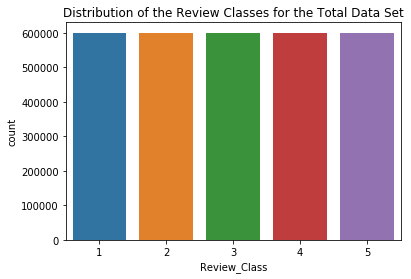

In [190]:
sns.countplot(x = "Review_Class", data = data)
plt.title("Distribution of the Review Classes for the Total Data Set")

In [285]:
sample_reviews = sampledata['Description'].tolist()

In [19]:
### Below is sample code from the lab that I used to figure out stemming, but it doesn't lead to the DTM

### Playing around with Stemming and stuff

In [18]:
stemmed_reviews = []

# loop through document list
for review in sample_reviews:
    
    # lowercase and tokenize document string
    raw = review.lower()

    tokens = wordpunct_tokenize(raw)

    # Using List comprehension for removing stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    stemmed_reviews.append(stemmed_tokens)

In [20]:
## We have a list of lists with 300,000 reviews
len(stemmed_reviews)

300000

In [21]:
#Example of a list of lists
stemmed_reviews[5]

['lid',
 'arriv',
 'knob',
 'separ',
 'part',
 'stay',
 'tight',
 'use',
 'last',
 'tri',
 'tighten',
 'glass',
 'explod',
 'safeti',
 'glass',
 'bit',
 'leav',
 'shrapnel',
 'wound',
 'hand',
 'call',
 '"',
 'secret',
 '"',
 'amazon',
 'custom',
 'servic',
 'number',
 'given',
 'refund',
 'without',
 'return',
 'lid',
 'offer',
 'pictur',
 'sink',
 'hand',
 'first',
 'half',
 'hour',
 'sinc',
 'box',
 'arriv',
 'still',
 'bleed',
 'desir',
 'spend',
 'even',
 'emerg',
 'room',
 'pan',
 'look',
 'great',
 'clean',
 'glass',
 'kitchen',
 'tri',
 'want',
 'replac',
 'lid',
 'could',
 'blind',
 'two',
 'star',
 'make',
 'wonder',
 'would',
 'take',
 'get',
 'one',
 'star',
 'rate']

In [6]:
len(sample_reviews)

100000

## Creating the DTM: Document Term Matrix

In [60]:
## Importing Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Creating Count Vectorizer with the stop words for one words and max feature of 3000
vect = CountVectorizer(stop_words = en_stop, ngram_range= (1,1), max_features=3000)

# Fitting the Count Vectorizer to the data
vect.fit(sample_reviews)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=3000, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs',...0', '500', '6', '60', '7', '70', '8', '80', '9', '90', ':', '<', '=', '>', '@', '[', ']', '`', '``'],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [62]:
dtm_first = vect.transform(sample_reviews)

print(dtm_first.shape)

(150000, 3000)


In [63]:
dtm_first.toarray()
print(vect.get_feature_names())

['00', '000', '19', '2002', '2004', '22', '80s', '95', '99', 'ability', 'able', 'absolute', 'absolutely', 'abuse', 'accept', 'acceptable', 'access', 'according', 'account', 'accurate', 'acoustic', 'across', 'act', 'acted', 'acting', 'action', 'actions', 'actor', 'actors', 'actress', 'acts', 'actual', 'actually', 'ad', 'adapter', 'add', 'added', 'adding', 'addition', 'additional', 'address', 'adds', 'adequate', 'adjust', 'admit', 'adult', 'adults', 'advance', 'advanced', 'advantage', 'adventure', 'adventures', 'advertised', 'advertising', 'advice', 'advise', 'afraid', 'african', 'age', 'ages', 'ago', 'agree', 'ahead', 'air', 'al', 'alarm', 'album', 'albums', 'alien', 'alive', 'allow', 'allowed', 'allows', 'almost', 'alone', 'along', 'alot', 'already', 'alright', 'also', 'alternative', 'although', 'always', 'amazed', 'amazing', 'amazon', 'america', 'american', 'americans', 'among', 'amount', 'amusing', 'analysis', 'ancient', 'angel', 'angle', 'angry', 'animal', 'animals', 'animation', 'a

In [75]:
## What I did above doesn't tokenize them, so I stealing the defined functions from the lab
#------------------------------------------------------------------------------------------------
# Putting it all together in one step
# Function (tokenize) that uses Porter stemmer and tokenizes the document
#------------------------------------------------------------------------------------------------

import nltk
from nltk import word_tokenize          
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

# Using the above function "tokenize" in CountVectorize function
# tokenize stems and tokenizes altogether

vect = CountVectorizer(tokenizer=tokenize, stop_words = en_stop, ngram_range= (1,1),max_features = 1000)
print("fit option has \n" ,vect.fit(sample_reviews))
dtm = vect.transform(sample_reviews)

fit option has 
 CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs',...0', '500', '6', '60', '7', '70', '8', '80', '9', '90', ':', '<', '=', '>', '@', '[', ']', '`', '``'],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function tokenize at 0x0000027C112E1A60>,
        vocabulary=None)


In [76]:
dtm.toarray()
print(vect.get_feature_names())

['abil', 'abl', 'abov', 'absolut', 'account', 'accur', 'across', 'act', 'action', 'actor', 'actual', 'ad', 'adapt', 'add', 'addit', 'adjust', 'admit', 'adult', 'adventur', 'advertis', 'advic', 'age', 'ago', 'agre', 'air', 'album', 'allow', 'almost', 'alon', 'along', 'alot', 'alreadi', 'also', 'although', 'alway', 'amaz', 'amazon', 'america', 'american', 'amount', 'ani', 'anim', 'annoy', 'anoth', 'answer', 'anymor', 'anyon', 'anyth', 'anyway', 'apart', 'appar', 'appear', 'appreci', 'approach', 'area', 'around', 'arriv', 'art', 'artist', 'ask', 'aspect', 'attach', 'attempt', 'attent', 'audio', 'author', 'avail', 'averag', 'avoid', 'aw', 'away', 'awesom', 'b', 'babi', 'back', 'background', 'bad', 'bag', 'ball', 'band', 'bar', 'bare', 'base', 'basic', 'batteri', 'battl', 'beat', 'beauti', 'becam', 'becaus', 'becom', 'bed', 'befor', 'begin', 'beginn', 'behind', 'believ', 'best', 'better', 'beyond', 'bibl', 'big', 'bit', 'black', 'blade', 'blue', 'bodi', 'book', 'bore', 'bother', 'bottl', 'b

In [77]:
print(vect.vocabulary_)

{'wa': 947, 'fun': 361, 'stori': 839, 'good': 380, 'time': 892, 'funni': 363, 'whole': 971, 'man': 520, 'world': 986, 'woman': 979, 'differ': 240, 'would': 990, 'recommend': 704, 'friend': 357, 'kind': 463, 'watch': 957, 'movi': 558, 'entir': 287, 'includ': 442, 'bed': 91, 'blue': 105, 'part': 619, 'black': 103, 'actual': 10, 'toy': 906, 'doe': 251, 'look': 505, 'nice': 575, 'photo': 634, 'thi': 881, 'book': 107, 'paper': 617, 'plan': 639, 'histori': 415, 'togeth': 897, 'even': 292, 'wors': 987, 'talk': 868, 'onli': 597, 'american': 38, 'english': 283, 'citi': 160, 'could': 199, 'learn': 481, 'develop': 236, 'much': 560, 'throughout': 889, 'also': 32, 'give': 372, 'insight': 446, 'design': 233, 'think': 884, 'process': 668, 'lot': 509, 'page': 611, 'one': 596, 'game': 365, 'play': 641, 'anyon': 46, 'sens': 762, 'humor': 430, 'open': 599, 'mind': 543, 'sex': 771, 'issu': 453, 'becaus': 89, 'realli': 699, 'almost': 27, 'imposs': 438, 'due': 264, 'set': 769, 'love': 511, 'arriv': 56, "n't

### Coverting DTM to a dataframe

In [78]:
## This DTM is term frequency based
df = pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())

print(df.shape)

df.head()

(100000, 1000)


abil  abl  abov  absolut  account  accur  across  act  action  actor  ...  \
0     0    0     0        0        0      0       0    0       0      0  ...   
1     0    0     0        0        0      0       0    0       0      0  ...   
2     0    0     0        0        0      0       0    0       0      0  ...   
3     0    0     0        0        0      0       0    0       0      0  ...   
4     0    0     0        0        0      0       0    0       0      0  ...   

   would  write  writer  written  wrong  wrote  ye  year  yet  young  
0      1      0       0        0      0      0   0     0    0      0  
1      0      0       0        0      0      0   0     0    0      0  
2      0      0       0        0      0      0   0     0    0      0  
3      0      0       0        0      0      0   0     0    0      0  
4      1      0       0        0      0      0   0     0    0      0  

[5 rows x 1000 columns]

In [80]:
## Pickling the dataframe so that I don't have to go through the whole mess of running the script again 
## (which I have done at least once already)

df.to_pickle('my_df.pickle')

In [81]:
## Now we can use TfidfTransformer on the frequency term DTM to make a weighted TFIDF
from sklearn.feature_extraction.text import TfidfTransformer


## Below uses l2 normalization as default, use_idf default is True
tfdif = TfidfTransformer()

dtm2 = tfdif.fit_transform(dtm)

weighted_df = pd.DataFrame(dtm2.toarray(), columns=vect.get_feature_names())

In [82]:
weighted_df.shape

(100000, 1000)

In [83]:
##Looking at df to see if counts have been changed to weights between 0 and 1

weighted_df.iloc[1:20, 290:300]

## And it did!!!

especi  etc      even  event      ever     everi  everyon   everyth  \
1      0.0  0.0  0.000000    0.0  0.000000  0.000000      0.0  0.000000   
2      0.0  0.0  0.176623    0.0  0.000000  0.000000      0.0  0.000000   
3      0.0  0.0  0.000000    0.0  0.000000  0.000000      0.0  0.000000   
4      0.0  0.0  0.000000    0.0  0.000000  0.000000      0.0  0.000000   
5      0.0  0.0  0.081690    0.0  0.000000  0.000000      0.0  0.000000   
6      0.0  0.0  0.000000    0.0  0.000000  0.000000      0.0  0.000000   
7      0.0  0.0  0.000000    0.0  0.000000  0.000000      0.0  0.000000   
8      0.0  0.0  0.000000    0.0  0.000000  0.000000      0.0  0.000000   
9      0.0  0.0  0.000000    0.0  0.000000  0.000000      0.0  0.000000   
10     0.0  0.0  0.116475    0.0  0.000000  0.000000      0.0  0.000000   
11     0.0  0.0  0.000000    0.0  0.000000  0.000000      0.0  0.000000   
12     0.0  0.0  0.000000    0.0  0.000000  0.000000      0.0  0.000000   
13     0.0  0.0  0.000000    0.0  0.000000  0.000000      0.0  0.000000   
14     0.0  0.0  0.000000    0.0  0.000000  0.000000      0.0  0.000000   
15     0.0  0.0  0.000000    0.0  0.000000  0.000000      0.0  0.000000   
16     0.0  0.0  0.000000    0.0  0.000000  0.000000      0.0  0.000000   
17     0.0  0.0  0.000000    0.0  0.000000  0.000000      0.0  0.000000   
18     0.0  0.0  0.000000    0.0  0.139582  0.141044      0.0  0.162205   
19     0.0  0.0  0.000000    0.0  0.000000  0.000000      0.0  0.000000   

    exactli  exampl  
1       0.0     0.0  
2       0.0     0.0  
3       0.0     0.0  
4       0.0     0.0  
5       0.0     0.0  
6       0.0     0.0  
7       0.0     0.0  
8       0.0     0.0  
9       0.0     0.0  
10      0.0     0.0  
11      0.0     0.0  
12      0.0     0.0  
13      0.0     0.0  
14      0.0     0.0  
15      0.0     0.0  
16      0.0     0.0  
17      0.0     0.0  
18      0.0     0.0  
19      0.0     0.0

In [86]:
weighted_df.to_pickle('weightedDTM.pickle')

In [ ]:
weighted_df = pd.read_pickle('weightedDTM.pickle')

In [87]:
## Deleting objects to help with RAM
del weighted_df

In [84]:
## Another TFIDF weighted document, but changing the defaults:

tfdif1 = TfidfTransformer(norm = 'l1', use_idf = False)

dtm3 = tfdif1.fit_transform(dtm)

weighted_df2 = pd.DataFrame(dtm3.toarray(), columns=vect.get_feature_names())



In [85]:
##Comparing same rows as above to see how the weighting changes

print(weighted_df2.shape)

weighted_df2.iloc[1:20, 290:300]

## And it looks like the numbers are "less"

(100000, 1000)


especi  etc      even  event   ever  everi  everyon  everyth  exactli  \
1      0.0  0.0  0.000000    0.0  0.000  0.000      0.0    0.000      0.0   
2      0.0  0.0  0.066667    0.0  0.000  0.000      0.0    0.000      0.0   
3      0.0  0.0  0.000000    0.0  0.000  0.000      0.0    0.000      0.0   
4      0.0  0.0  0.000000    0.0  0.000  0.000      0.0    0.000      0.0   
5      0.0  0.0  0.016949    0.0  0.000  0.000      0.0    0.000      0.0   
6      0.0  0.0  0.000000    0.0  0.000  0.000      0.0    0.000      0.0   
7      0.0  0.0  0.000000    0.0  0.000  0.000      0.0    0.000      0.0   
8      0.0  0.0  0.000000    0.0  0.000  0.000      0.0    0.000      0.0   
9      0.0  0.0  0.000000    0.0  0.000  0.000      0.0    0.000      0.0   
10     0.0  0.0  0.025641    0.0  0.000  0.000      0.0    0.000      0.0   
11     0.0  0.0  0.000000    0.0  0.000  0.000      0.0    0.000      0.0   
12     0.0  0.0  0.000000    0.0  0.000  0.000      0.0    0.000      0.0   
13     0.0  0.0  0.000000    0.0  0.000  0.000      0.0    0.000      0.0   
14     0.0  0.0  0.000000    0.0  0.000  0.000      0.0    0.000      0.0   
15     0.0  0.0  0.000000    0.0  0.000  0.000      0.0    0.000      0.0   
16     0.0  0.0  0.000000    0.0  0.000  0.000      0.0    0.000      0.0   
17     0.0  0.0  0.000000    0.0  0.000  0.000      0.0    0.000      0.0   
18     0.0  0.0  0.000000    0.0  0.025  0.025      0.0    0.025      0.0   
19     0.0  0.0  0.000000    0.0  0.000  0.000      0.0    0.000      0.0   

    exampl  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
5      0.0  
6      0.0  
7      0.0  
8      0.0  
9      0.0  
10     0.0  
11     0.0  
12     0.0  
13     0.0  
14     0.0  
15     0.0  
16     0.0  
17     0.0  
18     0.0  
19     0.0

In [88]:
weighted_df2.to_pickle('weightedDTM2.pickle')

In [89]:
del weighted_df2

In [100]:
del dtm2

In [101]:
del dtm3

In [202]:
df = pd.read_pickle("my_df.pickle")

In [203]:
weighted_df2 = pd.read_pickle('weightedDTM2.pickle')

In [204]:
weighted_df = pd.read_pickle('weightedDTM.pickle')

### Divide the data into train-test portions with the distribution of your choice.

### Dividing up the Frequency Term DTMs

In [205]:
## Import Train_test_split in order split up data ()
from sklearn.model_selection import train_test_split


## Setting test shape as 20%
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=.2,
                                                    random_state=1222)

In [206]:
## Doing the same for the other DTMs

#TFDIF default

X_train_weighted, X_test_weighted, y_train_weighted, y_test_weighted = train_test_split(weighted_df, y, test_size=.2,
                                                    random_state=1222)


In [207]:
## Doing the same for the other DTMs

#TFDIF default

X_train_weighted2, X_test_weighted2, y_train_weighted2, y_test_weighted2 = train_test_split(weighted_df2, y, test_size=.2,
                                                    random_state=1222)

## Perform at least three types of dimension reduction, e.g. sparse PCA, LLE, UMAP, t-SNE

### PCA

In [43]:
## We have no missing values, which is good
df.isnull().values.any() #Nope, which makes sense as the dataframe is pulled form descriptions that are all there


False

### Note: I attempted to run Outlier Analysis before conducting PCA, but it was showing no sign of stopping, so I gave up and proceeded without

In [ ]:
## Running outlier analysis before PCA
outlier_frac = 0.02

ell = EllipticEnvelope(contamination = outlier_frac)
ell.fit(X_train)

In [ ]:
## Creating an array of the 1000 points to see outliers vs. non-outliers, also creating a sum
pred = ell.predict(X_train)

print(sum(pred == -1) ) # Outlier points are predicted as -1

stats.itemfreq(pred)

In [ ]:
# We're only going to keep our non-outliers

keep = pred == 1

keepX_train = X_train[keep]

keepX_train.shape # We now have 966 rows

keepX_train.head()

### This ends the section on the Outlier Analysis that I didn't perform

### Dimension-Reduction

In [9]:
## Standardizing data (just in case) before running dimenison-reduction techniques
## First DTM (Frequency Distribution)
scaler = StandardScaler()

X_trainstd = scaler.fit_transform(X_train)

X_teststd = scaler.fit_transform(X_test)




C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [26]:
## Standardizing data (just in case) before running dimenison-reduction techniques
## Second and third DTMs (TDFIF, l1 and l2)
scaler = StandardScaler()

X_train_weightedstd = scaler.fit_transform(X_train_weighted)

X_test_weightedstd = scaler.fit_transform(X_test_weighted)


X_train_weightedstd2 = scaler.fit_transform(X_train_weighted2)

X_test_weightedstd2 = scaler.fit_transform(X_test_weighted2)


### I attempted to run PCA on my original DTM (300,000 rows by 3000 tokens) and it didn't reduce dimensons very well (80% variation explained for 2000ish principle components)

In [48]:
#Code ran for 300,000 rows by 3000 tokens

from sklearn.decomposition import PCA

pca = PCA(0.80)  #Keep the amount of variance explained to 80% 
pca.fit(X_trainstd)

pca.n_components_ #End up with 2192 components.....yikes

2192

### Dimension Reduction with UMAP, PCA, and Sparse PCA

In [10]:
sparsepca = SparsePCA(n_components = 3, n_jobs= -1) ## 30 columns/components would be 1% of the 3,000 columns
# tsne_fun = TSNE(n_components=2, perplexity=25, verbose=2, n_iter = 300) Tried to run tsne but elected against it
umap_fun = umap.UMAP(n_neighbors=15)
# lle_fun = LocallyLinearEmbedding(n_components=2, n_jobs=-1) Tried to run LLE but it was taking a long time
pca = PCA(0.80) #Defining amount of variation explained


#Keeping track of time taken
a = datetime.datetime.now()
print(a)

#UMAP fit and transform for X_train and X_test
umap_components_train = umap_fun.fit_transform(X_trainstd)
umap_components_test = umap_fun.transform(X_teststd)

z = datetime.datetime.now()


print(z)

#PCA fit and transform for X_train and X_test
pca_components_train = pca.fit_transform(X_trainstd)

x = datetime.datetime.now()
print(x)
pca_components_test = pca.transform(X_teststd)


b = datetime.datetime.now()

print(b)

#SparsePCA fit and transform for X_train and X_test
sparsepca_components_train = sparsepca.fit_transform(X_trainstd)
w = datetime.datetime.now()
print(w)
sparsepca_components_test = sparsepca.transform(X_teststd)

d = datetime.datetime.now()
print(d)


# lle_components_train = lle_fun.fit_transform(X_trainstd)
# lle_components_test = lle_fun.transform(X_teststd)

# g = datetime.datetime.now()
# print(g)




2019-12-13 00:25:11.227823
2019-12-13 00:32:18.724658
2019-12-13 00:32:30.794443
2019-12-13 00:32:31.261193


C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\decomposition\sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


2019-12-13 00:46:16.223575
2019-12-13 00:46:16.313335


### Thought about doing Isomap but it was taking a long time as well

In [ ]:
# from sklearn.manifold import Isomap

# isomap_fun = Isomap(n_components=2, n_jobs=-1)

# isomap_components_train = isomap_fun.fit_transform(X_trainstd)
# isomap_components_test = isomap_fun.transform(X_teststd)

# isomap_components_test.shape

### Creating the Dataframes for the Reduced Dimensions

In [11]:
## First DTM Reduced DataFrame
# PCA dataframe
cols = []
for i in range (1, 731):
    cols.append("PC" + str(i))

PCdftrain = pd.DataFrame(pca_components_train, columns = cols)
PCdftrain.head()

PCdftest = pd.DataFrame(pca_components_test, columns = cols)
PCdftest.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.153569 -0.614749 -0.459748  0.893542 -0.433712  1.093082  1.317986   
1 -3.045844  0.484613  0.179935  0.270698 -1.996360  0.459567  0.423605   
2 -1.775440 -0.793725 -2.302140  2.586888  0.105042  1.005096 -0.548600   
3 -3.165367 -1.517548  0.959771 -0.629643 -0.163129 -0.626875  0.297960   
4  1.023798  3.899350 -2.053212  0.283401  0.286872  1.788705 -0.479445   

        PC8       PC9      PC10  ...     PC721     PC722     PC723     PC724  \
0 -0.341815  0.014454  0.352282  ... -0.252541 -0.894120  0.117846  0.622108   
1 -0.926629 -0.814264 -0.678862  ... -0.949663  0.603591  0.406413 -0.571612   
2  0.003941  0.221338 -0.513468  ... -2.310704 -0.853545 -2.075135 -0.714914   
3  2.455247 -0.076922  0.670294  ...  0.479436  0.448111 -0.405254  0.037196   
4 -1.569729 -4.062418  0.026568  ... -0.653820  0.094718  0.674336 -1.341023   

      PC725     PC726     PC727     PC728     PC729     PC730  
0 -0.993535 -0.875139  0.069201 -0.242671  0.695419 -0.163755  
1  0.144301  0.343695  0.670821 -0.212764  0.323863  0.871215  
2 -0.731201  0.451324 -1.658154  0.355467  0.672508 -0.584179  
3  0.042409  0.608501  0.452207  0.172019 -0.381616  0.790290  
4  1.039038  2.618644 -0.761850 -0.693146  0.509216 -1.126160  

[5 rows x 730 columns]

In [12]:
# SparsePCA dataframe
cols = []
for i in range (1, 4):
    cols.append("SparsePC" + str(i))

SparsePCdftrain = pd.DataFrame(sparsepca_components_train, columns = cols)
SparsePCdftrain.head()

SparsePCdftest = pd.DataFrame(sparsepca_components_test, columns = cols)
SparsePCdftest.head()

SparsePC1  SparsePC2  SparsePC3
0   0.006741   0.004353  -0.004348
1   0.007837   0.001491  -0.002293
2   0.002147   0.002651  -0.008576
3   0.006748   0.007505  -0.000362
4  -0.000191  -0.012918  -0.004359

In [13]:
# UMAP dataframe

cols = []
for i in range (1, 3):
    cols.append("UMAP" + str(i))

umapdftrain = pd.DataFrame(umap_components_train, columns = cols)
umapdftrain.head()

umapdftest = pd.DataFrame(umap_components_test, columns = cols)
umapdftest.head()

UMAP1     UMAP2
0  2.333379 -0.309857
1  3.442311  2.238543
2  2.635384  0.161051
3  3.446002  2.147426
4  1.635726  1.975930

In [14]:
## Concatenating First DTM components into one (train)
X_traindf = pd.concat([PCdftrain,SparsePCdftrain,umapdftrain], axis = 1)
X_traindf.shape

(80000, 735)

In [16]:
## Concatenating First DTM components into one (test)
X_testdf = pd.concat([PCdftest,SparsePCdftest,umapdftest], axis = 1)
X_testdf.shape

(20000, 735)

In [15]:
## Pickling objects in case the script crashes
X_traindf.to_pickle('DTM1x_train')

In [17]:
X_testdf.to_pickle('DTM1x_test')

### Reducing Dimensions for the weighted DTMs

In [27]:
##First weighteddf
a = datetime.datetime.now()
print(a)
umap_components_train_weighted = umap_fun.fit_transform(X_train_weightedstd)

c = datetime.datetime.now()
print(c)

umap_components_test_weighted = umap_fun.transform(X_test_weightedstd)


b = datetime.datetime.now()

print(b)

sparsepca_components_train_weighted = sparsepca.fit_transform(X_train_weightedstd)

w = datetime.datetime.now()
print(w)

sparsepca_components_test_weighted = sparsepca.transform(X_test_weightedstd)

d = datetime.datetime.now()
print(d)

pca_components_train_weighted = pca.fit_transform(X_train_weightedstd)

x = datetime.datetime.now()
print(x)
pca_components_test_weighted = pca.transform(X_test_weightedstd)

# lle_components_train_weighted = lle_fun.fit_transform(X_train_weightedstd)

# f= datetime.datetime.now()
# print(f)

# lle_components_test_weighted = lle_fun.transform(X_test_weightedstd)

g = datetime.datetime.now()
print(g)

## Second weighted df

h = datetime.datetime.now()
print(h)
umap_components_train_weighted2= umap_fun.fit_transform(X_train_weightedstd2)
umap_components_test_weighted2 = umap_fun.transform(X_test_weightedstd2)


i = datetime.datetime.now()

print(i)

sparsepca_components_train_weighted2 = sparsepca.fit_transform(X_train_weightedstd2)
sparsepca_components_test_weighted2 = sparsepca.transform(X_test_weightedstd2)

d = datetime.datetime.now()# PCA dataframe

print(d)

pca_components_train_weighted2 = pca.fit_transform(X_train_weightedstd2)

x = datetime.datetime.now()
print(x)
pca_components_test_weighted2 = pca.transform(X_test_weightedstd2)

# lle_components_train_weighted2 = lle_fun.fit_transform(X_train_weightedstd2)
# lle_components_test_weighted2 = lle_fun.transform(X_test_weightedstd2)

g = datetime.datetime.now()
print(g)

2019-12-13 09:57:01.256610
2019-12-13 10:00:18.245635
2019-12-13 10:09:32.850657


C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\decomposition\sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


2019-12-13 10:19:58.335250
2019-12-13 10:19:58.427184
2019-12-13 10:20:16.986072
2019-12-13 10:20:17.570207
2019-12-13 10:20:17.571204
2019-12-13 10:31:09.752231


C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\decomposition\sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


2019-12-13 10:44:28.876442
2019-12-13 10:44:45.981456
2019-12-13 10:44:46.577154


In [41]:
pca_components_train_weighted2.shape

(80000, 740)

## Constructing the dimension-reduced DataFrame for both weighted DTMs

In [43]:
# PCA dataframe
cols1 = []
for i in range (1, 743):
    cols1.append("PC" + str(i))

PCdftrain1 = pd.DataFrame(pca_components_train_weighted, columns = cols1)
PCdftrain1.head()

PCdftest1 = pd.DataFrame(pca_components_test_weighted, columns = cols1)
PCdftest1.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.408972 -0.903992  2.187435 -2.385290  1.497598 -1.449577  1.817295   
1  2.208668  0.180236  1.029843 -3.613831 -1.380283 -0.717116  0.226838   
2 -0.256210 -2.483758  3.101522 -0.179336  0.607136 -1.363683 -0.508624   
3 -1.327910  2.198539 -0.443004 -3.030993  2.840158  3.309831 -2.489209   
4  2.702513 -1.686461 -0.076609 -0.064788  0.944533 -1.179508 -1.558729   

        PC8       PC9      PC10  ...     PC733     PC734     PC735     PC736  \
0 -0.854325 -0.679281  0.457934  ... -0.584140  0.227259  1.426229  1.014658   
1 -2.209542  2.007142 -1.209800  ...  0.240445  1.074985  0.165803 -1.776081   
2  0.236687  0.226082 -0.717961  ... -0.159053 -1.520660  2.079710  1.070512   
3  3.808552 -0.999441  0.550214  ... -1.105167  0.552114 -1.133133 -0.001305   
4 -2.851879  1.189898 -0.111381  ... -0.470304 -0.247513 -0.814857  0.217882   

      PC737     PC738     PC739     PC740     PC741     PC742  
0  0.657029 -0.831581 -1.351283  1.527798 -2.195233  1.363271  
1  0.127078  0.000521  0.077502  1.931260 -0.639270 -1.200279  
2 -0.843663 -0.767699 -1.364425 -0.795633  0.602385  1.270173  
3 -0.228930  0.845081  0.155241  0.016517 -0.932974  1.238645  
4 -1.001899 -0.148873  0.324029 -1.230887  0.443591  0.377715  

[5 rows x 742 columns]

In [45]:
# SparsePCA dataframe
cols = []
for i in range (1, 4):
    cols.append("SparsePC" + str(i))

SparsePCdftrain1 = pd.DataFrame(sparsepca_components_train_weighted, columns = cols)
SparsePCdftrain1.head()

SparsePCdftest1 = pd.DataFrame(sparsepca_components_test_weighted, columns = cols)
SparsePCdftest1.head()

SparsePC1  SparsePC2  SparsePC3
0   0.001575   0.000395  -0.008076
1   0.007036  -0.000683  -0.003211
2  -0.000564   0.002878  -0.015029
3  -0.004493  -0.006207   0.005945
4   0.009141   0.006699  -0.001964

In [46]:
# UMAP dataframe

cols = []
for i in range (1, 3):
    cols.append("UMAP" + str(i))

umapdftrain1 = pd.DataFrame(umap_components_train_weighted, columns = cols)
umapdftrain1.head()

umapdftest1 = pd.DataFrame(umap_components_test_weighted, columns = cols)
umapdftest1.head()

UMAP1     UMAP2
0  3.082315 -0.640748
1  2.992180 -0.517685
2  0.792967  2.653587
3  2.954683 -0.668824
4  3.089722 -0.628981

In [47]:
X_traindf1 = pd.concat([PCdftrain1,SparsePCdftrain1,umapdftrain1], axis = 1)
X_traindf1.shape

(80000, 747)

In [49]:
X_testdf1 = pd.concat([PCdftest1,SparsePCdftest1,umapdftest1], axis = 1)
X_testdf1.shape

(20000, 747)

In [48]:
X_traindf1.to_pickle('DTM2x_train')

In [50]:
X_testdf1.to_pickle('DTM2x_test')

In [51]:
# PCA dataframe
cols1 = []
for i in range (1, 741):
    cols1.append("PC" + str(i))

PCdftrain2 = pd.DataFrame(pca_components_train_weighted2, columns = cols1)
PCdftrain2.head()

PCdftest2 = pd.DataFrame(pca_components_test_weighted2, columns = cols1)
PCdftest2.head()

# SparsePCA dataframe
cols = []
for i in range (1, 4):
    cols.append("SparsePC" + str(i))

SparsePCdftrain2 = pd.DataFrame(sparsepca_components_train_weighted2, columns = cols)
SparsePCdftrain2.head()

SparsePCdftest2 = pd.DataFrame(sparsepca_components_test_weighted2, columns = cols)
SparsePCdftest2.head()

# UMAP dataframe

cols = []
for i in range (1, 3):
    cols.append("UMAP" + str(i))

umapdftrain2 = pd.DataFrame(umap_components_train_weighted2, columns = cols)
umapdftrain2.head()

umapdftest2 = pd.DataFrame(umap_components_test_weighted2, columns = cols)
umapdftest2.head()

UMAP1     UMAP2
0 -3.888288 -2.207293
1  2.707279  0.073980
2  0.300139 -1.822631
3  0.701286  2.582108
4 -1.238071  0.623042

In [52]:
X_traindf2 = pd.concat([PCdftrain2,SparsePCdftrain2,umapdftrain2], axis = 1)
X_traindf2.shape

X_testdf2 = pd.concat([PCdftest2,SparsePCdftest2,umapdftest2], axis = 1)
X_testdf2.shape

(20000, 745)

In [53]:
X_traindf2.to_pickle('DTM3x_train')

In [54]:
X_testdf2.to_pickle('DTM3x_test')

In [12]:
X_train_sam = X_train.sample(n = 200)
X_test_sam = X_test.sample(n = 200)

In [14]:
X_train_sam.head()

abil  abl  abov  absolut  account  accur  across  act  action  actor  \
78185     0    0     0        0        0      0       0    0       0      0   
73977     0    0     0        0        0      0       0    0       0      0   
87391     0    1     0        0        0      0       0    0       0      0   
91358     0    0     0        0        0      0       0    0       0      0   
96751     0    0     0        0        0      0       0    1       0      0   

       ...  would  write  writer  written  wrong  wrote  ye  year  yet  young  
78185  ...      0      0       0        0      0      0   0     0    0      0  
73977  ...      0      0       0        0      0      0   0     0    0      0  
87391  ...      0      0       0        0      0      0   0     0    0      0  
91358  ...      1      0       0        1      0      0   0     0    0      0  
96751  ...      0      0       0        0      0      0   0     0    0      0  

[5 rows x 1000 columns]

In [13]:

scaler = StandardScaler()

X_trainsamstd = scaler.fit_transform(X_train_sam)
X_testsamstd = scaler.fit_transform(X_test_sam)


C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


#### T-SNE (Did not end up using T-SNE, but below is sample code)

In [84]:
# # Import necessary dependencies 

# from sklearn.manifold import TSNE

# a = datetime.datetime.now()

# #Keeping verbose cause I like to see the things print, 500 iterations, perplexity at 35
# tsne_components = TSNE(n_components=2, perplexity=25, verbose=2, n_iter = 300).fit_transform(X_trainsstd)

# b = datetime.datetime.now()

# c = b- a 

# c

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.004s...
[t-SNE] Computed neighbors for 200 samples in 0.059s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 8.282624
[t-SNE] Computed conditional probabilities in 0.008s
[t-SNE] Iteration 50: error = 131.3807983, gradient norm = 0.1850271 (50 iterations in 0.046s)
[t-SNE] Iteration 100: error = 152.3801727, gradient norm = 0.2403990 (50 iterations in 0.044s)
[t-SNE] Iteration 150: error = 157.5357208, gradient norm = 0.1763036 (50 iterations in 0.047s)
[t-SNE] Iteration 200: error = 154.8413239, gradient norm = 0.1547385 (50 iterations in 0.053s)
[t-SNE] Iteration 250: error = 146.8522797, gradient norm = 0.1648917 (50 iterations in 0.050s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 146.852280
[t-SNE] Iteration 300: error = 3.8613393, gradient norm = 0.0039511 (50 iterations in 0.041s)
[t-SNE] KL divergence after 300 iterations: 3.861339


datetime.timedelta(microseconds=351288)

In [ ]:
#We have our tsne components for 966 observations
tsne_components.shape

#### LLE (Did not end up running because it took so long, code below is test code)

In [ ]:
# from sklearn.manifold import LocallyLinearEmbedding

# a = datetime.datetime.now()

# embedding = LocallyLinearEmbedding(n_components=2, n_jobs=-1)
# X_transformedLLE = embedding.fit_transform(X_trainstd)

# b = datetime.datetime.now()

# c = b - a
# c


In [19]:
# X_transformedLLE

array([[ 2.00303701e-04,  5.56594776e-02],
       [ 5.01418446e-03,  3.37621186e-02],
       [ 3.70118683e-03,  3.24584928e-02],
       [ 6.50245109e-03,  6.61136254e-02],
       [ 4.50132367e-03,  3.96370518e-02],
       [ 5.44145345e-03,  2.99222109e-02],
       [-3.34148832e-03,  2.22025057e-02],
       [ 6.53865920e-03,  7.46769000e-02],
       [-2.92337625e-02, -6.17521833e-02],
       [-4.21226213e-02, -1.11389792e-01],
       [-3.51506434e-02, -8.59132433e-02],
       [-7.57458566e-03, -8.77122361e-03],
       [-1.98712072e-02, -7.52172182e-02],
       [-2.50948740e-02, -9.58810862e-02],
       [-2.32383201e-02, -6.30438528e-02],
       [ 3.54593408e-03,  3.68338550e-02],
       [-1.37746710e-02, -5.95107887e-02],
       [ 1.73861581e-03,  2.66797359e-02],
       [-5.36598528e-02, -1.49415817e-01],
       [ 1.01625867e-03,  7.85172808e-02],
       [ 4.13556790e-03,  4.14534973e-02],
       [ 3.40007194e-03,  2.30833601e-02],
       [-7.90072085e-03, -9.39867915e-02],
       [-2.

#### UMAP

In [141]:
y_train.head()

Class
31367      2
85891      5
5199       4
66905      2
5622       1

In [305]:
y_map = y_train.Class

y_map.head()



31367    2
85891    5
5199     4
66905    2
5622     1
Name: Class, dtype: int64

In [94]:
from matplotlib.pyplot import figure

In [306]:
y_map

31367    2
85891    5
5199     4
66905    2
5622     1
18919    1
57941    1
35854    2
49635    1
25733    5
67393    4
52986    2
7070     2
71841    5
38808    2
24890    3
67358    1
98057    1
95148    3
18340    2
85582    1
60997    3
21581    3
61537    1
64266    5
88241    1
69527    4
70375    3
60178    2
96337    3
        ..
86766    1
4762     2
40237    2
23499    2
9348     4
50679    4
95399    4
33009    1
847      5
26210    2
65794    2
18465    5
19010    3
95376    3
6802     3
83479    2
92035    3
24483    4
16679    4
25470    2
33626    2
6745     4
28314    4
2412     2
57179    5
71125    3
59824    4
53991    4
32183    1
46861    3
Name: Class, Length: 80000, dtype: int64

In [310]:
umap_components_train = X_traindf.iloc[:,-5:-3]


Text(0.5, 1.0, 'Amazon Reviews Embedded via UMAP')

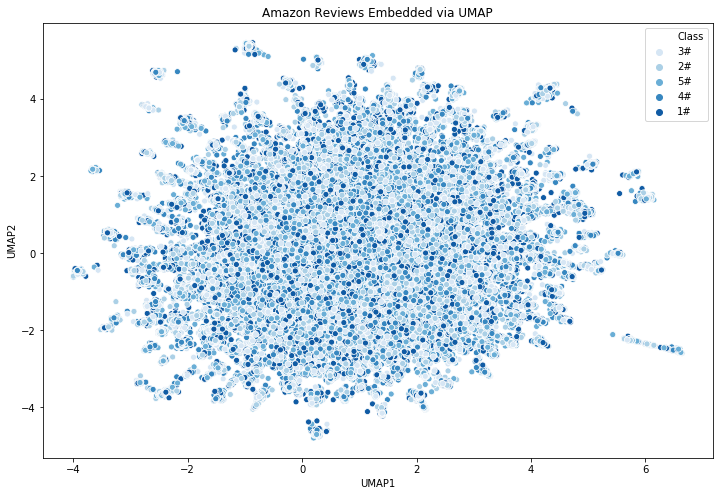

In [311]:
classes = ['1', '2', '3', '4', '5']

fig, ax = plt.subplots(1, figsize=(12, 8))

sns.scatterplot(x = umap_components_train.iloc[:,0], y = umap_components_train.iloc[:,1], hue = y_map.astype(str)+'#', palette= 'Blues') 

plt.title('Amazon Reviews Embedded via UMAP')

C:\Users\Jordan\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


Text(0.5, 1.0, 'Amazon Reviews Embedded via UMAP')

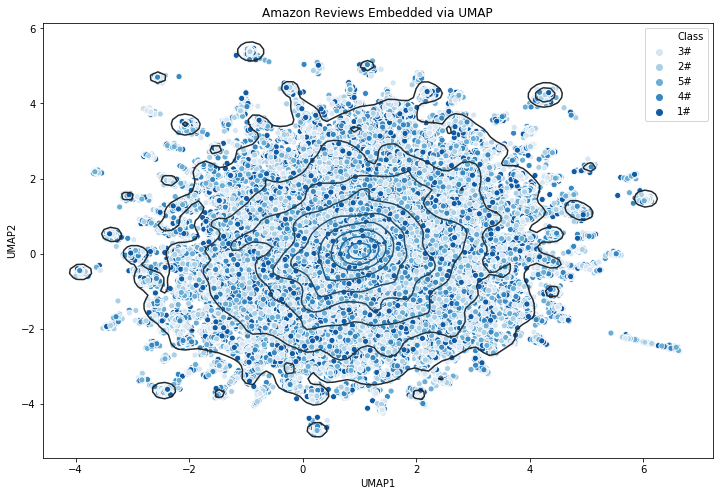

In [315]:
fig, ax = plt.subplots(1, figsize=(12, 8))

sns.kdeplot(umap_components_train, ax = ax)

sns.scatterplot(x = umap_components_train.iloc[:,0], y = umap_components_train.iloc[:,1], hue = y_map.astype(str)+'#', palette= 'Blues') 

plt.title('Amazon Reviews Embedded via UMAP')

C:\Users\Jordan\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


Text(0.5, 1.0, 'Amazon Reviews Embedded via UMAP')

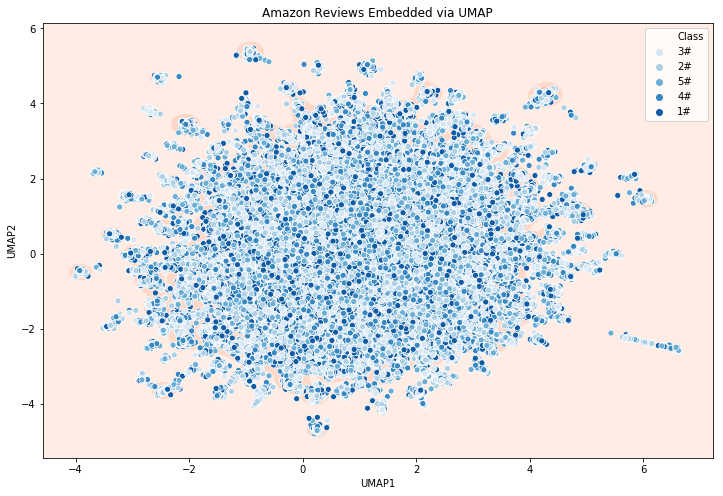

In [318]:
fig, ax = plt.subplots(1, figsize=(12, 8))

sns.kdeplot(data = umap_components_train, ax = ax, shade = True, cmap = 'Reds')

sns.scatterplot(x = umap_components_train.iloc[:,0], y = umap_components_train.iloc[:,1], hue = y_map.astype(str)+'#', palette= 'Blues') 

plt.title('Amazon Reviews Embedded via UMAP')

## Machine Learning for Classification

In [200]:
X_traindf = pd.read_pickle('DTM1x_train')
X_testdf = pd.read_pickle('DTM1x_test')


#### There are a few models that can handle multi-class classification, and those include KNN, Random Forest, Gradient Boost, and XGBoost.

In [5]:
from sklearn import preprocessing

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import seaborn as sns
import matplotlib
from matplotlib import pyplot

from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [144]:
X_testsam = X_testdf.iloc[0:50, :]

X_testsam

X_trainsam = X_traindf.iloc[0:10000, :]

X_trainsam.shape

y_trainsam = y_train.iloc[0:10000, :]

y_trainsam.shape

(10000, 1)

In [72]:
## KNN Grid Search (Developing intuition for what the best parameters might be)

## With so many classes, I think it's better to have more neighbors to break a potential tie (and even numbers since we 
## have 5 classes)

# With 50 samples, parameters: {'n_neighbors': 16, 'weights': 'uniform'}, were best, with a best score of -1.6121770800321
# With 1000 samples, parameters: {'n_neighbors': 16, 'weights': 'uniform'} with a best score of -2.129889630562538
# # With 2000 samples, parameters: {'n_neighbors': 16, 'weights': 'uniform'} with a best score of -2.156536686567891
# # With 5000 samples, parameters: {'n_neighbors': 16, 'weights': 'distance'} with a best score of -2.7992097751689817
## With 10000 samples, parameters: {'n_neighbors': 16, 'weights': 'distance'} wth a best score of -3.747373847212654

## As the sample increases, sparsity increases too

n_neighbors= [6,8,10,12,14,16]
weights=['uniform','distance'] #


param_grid = dict(n_neighbors= n_neighbors,
                  weights=weights)

knn_class = KNeighborsClassifier(algorithm = 'kd_tree', p = 2)

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
grid_search = GridSearchCV(knn_class, param_grid, scoring="neg_log_loss", cv=kfold, verbose=1, n_jobs=-1)

grid_result = grid_search.fit(X_trainsam, y_trainsam)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 18.2min finished
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [73]:
grid_result.best_score_

-3.747373847212654

In [74]:
grid_result.best_params_

{'n_neighbors': 16, 'weights': 'distance'}

In [70]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

-9.492688 (0.046602) with: {'n_neighbors': 6, 'weights': 'uniform'}
-9.492235 (0.046887) with: {'n_neighbors': 6, 'weights': 'distance'}
-6.751361 (0.075412) with: {'n_neighbors': 8, 'weights': 'uniform'}
-6.750880 (0.075345) with: {'n_neighbors': 8, 'weights': 'distance'}
-5.389486 (0.402243) with: {'n_neighbors': 10, 'weights': 'uniform'}
-5.388644 (0.401774) with: {'n_neighbors': 10, 'weights': 'distance'}
-4.362959 (0.433037) with: {'n_neighbors': 12, 'weights': 'uniform'}
-4.361896 (0.432408) with: {'n_neighbors': 12, 'weights': 'distance'}
-3.496869 (0.485891) with: {'n_neighbors': 14, 'weights': 'uniform'}
-3.495843 (0.485143) with: {'n_neighbors': 14, 'weights': 'distance'}
-2.799958 (0.378528) with: {'n_neighbors': 16, 'weights': 'uniform'}
-2.799210 (0.378091) with: {'n_neighbors': 16, 'weights': 'distance'}


In [87]:
## Random Forest
## With 100 samples, best parameters: {'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 100}, best score is
## -1.5519026635827289
## With 1000 samples, best parameters: {'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 300}, best score is
## -1.5596542789214074
## With 10000 samples, best parameters: {'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 500}, best score is 
## -1.5059156228934139



n_estimators= [100, 300, 500]
min_samples_split = [5,10,15]
min_samples_leaf = [5, 10, 15]


param_grid = dict(n_estimators=n_estimators,
                  min_samples_split = min_samples_split,
                 min_samples_leaf= min_samples_leaf)

rf_class = RandomForestClassifier()

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
grid_search = GridSearchCV(rf_class, param_grid, scoring="neg_log_loss", cv=kfold, verbose=1, n_jobs=-1)

grid_result = grid_search.fit(X_trainsam, y_trainsam)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 14.0min finished
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [88]:
grid_result.best_params_

{'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 500}

In [89]:
grid_result.best_score_

-1.5059156228934139

In [90]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
##Below are the parameters scores--there doesn't seem to be an overwhelming difference with the parameters being different

-1.514501 (0.003483) with: {'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}
-1.507244 (0.000883) with: {'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 300}
-1.505916 (0.000489) with: {'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 500}
-1.513663 (0.002587) with: {'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}
-1.509166 (0.000967) with: {'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 300}
-1.506154 (0.000451) with: {'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 500}
-1.514141 (0.003831) with: {'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 100}
-1.506737 (0.003077) with: {'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 300}
-1.506420 (0.001880) with: {'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 500}
-1.512127 (0.003569) with: {'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 100}
-1.508532 (0.001948) with: {'min_

In [145]:
## Gradient Boost

## With 100 samples, best parameters:{'min_samples_leaf': 10, 'min_samples_split': 5,'n_estimators': 100, 'subsample': 0.7}, 
## best score is -1.795376764379915
## With 1000 samples, best parameters: , {'min_samples_leaf': 10,'min_samples_split': 10,'n_estimators': 100,'subsample': 0.7}
## best score is -1.5988903856298606
## With 10000 samples, best parameters: {'min_samples_leaf': 10,'min_samples_split': 10,'n_estimators': 100,'subsample': 0.7},
## best score is -1.3877265629120112

n_estimators= [100, 300, 500]
subsample= [0.7, 1]
min_samples_split = [5, 10]
min_samples_leaf = [5, 10]


param_grid = dict(n_estimators=n_estimators,
                 subsample = subsample,
                 min_samples_split = min_samples_split,
                 min_samples_leaf = min_samples_leaf)

gb_class = GradientBoostingClassifier()

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
grid_search = GridSearchCV(gb_class, param_grid, scoring="neg_log_loss", cv=kfold, verbose=1, n_jobs=-1)

grid_result = grid_search.fit(X_trainsam, y_trainsam)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 84.8min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 178.0min finished
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [146]:
print(grid_result.best_score_)
grid_result.best_params_

-1.3877265629120112


{'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 100,
 'subsample': 0.7}

In [147]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

-1.395643 (0.007394) with: {'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.7}
-1.395192 (0.008058) with: {'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 1}
-1.421646 (0.017851) with: {'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 300, 'subsample': 0.7}
-1.418849 (0.013151) with: {'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 300, 'subsample': 1}
-1.471092 (0.014548) with: {'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 500, 'subsample': 0.7}
-1.456866 (0.016419) with: {'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 500, 'subsample': 1}
-1.396325 (0.004857) with: {'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.7}
-1.395295 (0.008101) with: {'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 1}
-1.422422 (0.008457) with: {'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 30

In [148]:
## XGBoost

## With 100 samples, best parameters: {'max_depth': 6, 'n_estimators': 100, 'subsample': 0.4}, best score is
## -1.671041528582573
## With 1000 samples, best parameters: {'max_depth': 8, 'n_estimators': 100, 'subsample': 0.6}, best score is
## -1.549272598274052
## With 10000 samples, best parameters: {'max_depth': 6, 'n_estimators': 100, 'subsample': 0.6}, best score is
## -1.4125631972648203

n_estimators = [100, 300, 500]
subsample = [0.4, 0.6] 
max_depth = [6, 8] 

param_grid = dict(n_estimators=n_estimators,
                  subsample = subsample,
                  max_depth = max_depth)

xgb_class = XGBClassifier()

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
grid_search = GridSearchCV(xgb_class, param_grid, scoring="neg_log_loss", cv=kfold, verbose=1, n_jobs=-1)

grid_result = grid_search.fit(X_trainsam, y_trainsam)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 157.1min finished
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [152]:
grid_result.best_params_

{'max_depth': 6, 'n_estimators': 100, 'subsample': 0.6}

In [150]:
grid_result.best_score_

-1.4125631972648203

In [151]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

-1.431941 (0.016329) with: {'max_depth': 6, 'n_estimators': 100, 'subsample': 0.4}
-1.412563 (0.013766) with: {'max_depth': 6, 'n_estimators': 100, 'subsample': 0.6}
-1.481273 (0.017985) with: {'max_depth': 6, 'n_estimators': 300, 'subsample': 0.4}
-1.458862 (0.015839) with: {'max_depth': 6, 'n_estimators': 300, 'subsample': 0.6}
-1.528719 (0.022109) with: {'max_depth': 6, 'n_estimators': 500, 'subsample': 0.4}
-1.510690 (0.017566) with: {'max_depth': 6, 'n_estimators': 500, 'subsample': 0.6}
-1.439757 (0.006643) with: {'max_depth': 8, 'n_estimators': 100, 'subsample': 0.4}
-1.419150 (0.011592) with: {'max_depth': 8, 'n_estimators': 100, 'subsample': 0.6}
-1.476512 (0.005531) with: {'max_depth': 8, 'n_estimators': 300, 'subsample': 0.4}
-1.456133 (0.018396) with: {'max_depth': 8, 'n_estimators': 300, 'subsample': 0.6}
-1.509688 (0.007213) with: {'max_depth': 8, 'n_estimators': 500, 'subsample': 0.4}
-1.491470 (0.020394) with: {'max_depth': 8, 'n_estimators': 500, 'subsample': 0.6}


### Building models for the DTMS

In [262]:
X_traindf1= pd.read_pickle('DTM2x_train') 
X_traindf2= pd.read_pickle('DTM3x_train') 

X_testdf1= pd.read_pickle('DTM2x_test') 
X_testdf2= pd.read_pickle('DTM3x_test')

In [194]:
def model_knn(X_train, y_train, X_test, y_test):
    #knn model
    knn_class = KNeighborsClassifier(algorithm = 'kd_tree', weights = 'distance',p = 2, n_neighbors = 16, n_jobs=-1)
    knn_class.fit(X_train,y_train)
    predictions = knn_class.predict(X_test)
#     accuracy = accuracy_score(y_test, predictions)
#     accuracyscore.append(accuracy)
    f1 = f1_score(y_test, predictions, average = 'micro') # We have to change the average for a multiclass problem
    f1score.append(f1)
    print(f1)
#     print(accuracy)
    

In [193]:
def model_rf(X_train, y_train, X_test, y_test):
    rf_class = RandomForestClassifier(min_samples_split=15, min_samples_leaf=15, random_state=12, n_estimators = 300, n_jobs=-1)
    rf_class.fit(X_train, y_train)
    predictions = rf_class.predict(X_test)
#     accuracy = accuracy_score(y_test, predictions)
#     accuracyscore.append(accuracy)
    f1 = f1_score(y_test, predictions, average = 'micro') # We have to change the average for a multiclass problem
    f1score.append(f1)
    print(f1)
#     print(accuracy)


In [191]:
## Gradient Boost
def model_gradboost(X_train, y_train, X_test, y_test):
    grad_class = GradientBoostingClassifier(min_samples_split=10, min_samples_leaf=10, random_state=12,
                                           n_estimators = 100, subsample = 0.7)
    grad_class.fit(X_train, y_train)
    predictions = grad_class.predict(X_test)
#     accuracy = accuracy_score(y_test, predictions)
#     accuracyscore.append(accuracy)
    f1 = f1_score(y_test, predictions, average = 'micro') # We have to change the average for a multiclass problem
    f1score.append(f1)
    print(f1)
#     print(accuracy)



In [258]:
## XGBoost
def model_xgboost(X_train, y_train, X_test, y_test):
    xgb_class = XGBClassifier(n_estimators = 100, subsample = 0.6, max_depth = 6)
    xgb_class.fit(X_train, y_train)
    predictions = xgb_class.predict(X_test)
#     accuracy = accuracy_score(y_test, predictions)
#     accuracyscore.append(accuracy)
    f1 = f1_score(y_test, predictions, average = 'micro') # We have to change the average for a multiclass problem
    f1score.append(f1)
    print(f1)
#     print(accuracy)
    


In [181]:
X_trainsam = X_traindf.iloc[0:100, :]
X_testsam = X_testdf.iloc[0:100, :]
y_trainsam = y_train.iloc[0:100, :]
y_testsam = y_test.iloc[0:100, :]

In [142]:
X_testsam.iloc[:,-2:].head()

UMAP1     UMAP2
0  2.333379 -0.309857
1  3.442311  2.238543
2  2.635384  0.161051
3  3.446002  2.147426
4  1.635726  1.975930

In [265]:
## For the first DTM

knn_class = KNeighborsClassifier(algorithm = 'kd_tree', weights = 'distance',p = 2, n_neighbors = 16,n_jobs=-1)
rf_class = RandomForestClassifier(min_samples_split=15, min_samples_leaf=15, random_state=12, n_estimators = 300, n_jobs=-1)
grad_class = GradientBoostingClassifier(min_samples_split=10, min_samples_leaf=10, random_state=12,
                                           n_estimators = 100, subsample = 0.7)
xgb_class = XGBClassifier(n_estimators = 100, subsample = 0.6, max_depth = 6)


accuracy = []
f1score = []

print("KNN Models " + str(datetime.datetime.now()))
model_knn(X_traindf, y_train, X_testdf, y_test)
model_knn(X_traindf.iloc[:,-5:-2], y_train, X_testdf.iloc[:,-5:-2], y_test)
model_knn(X_traindf.iloc[:,-2:], y_train, X_testdf.iloc[:,-2:], y_test)

print("RF Models " + str(datetime.datetime.now()))

model_rf(X_traindf, y_train, X_testdf, y_test)
model_rf(X_traindf.iloc[:,-5:-2], y_train, X_testdf.iloc[:,-5:-2], y_test)
model_rf(X_traindf.iloc[:,-2:], y_train, X_testdf.iloc[:,-2:], y_test)

print("Gradient Boost Models " + str(datetime.datetime.now()))

model_gradboost(X_traindf, y_train, X_testdf, y_test)
model_gradboost(X_traindf.iloc[:,-5:-2], y_train, X_testdf.iloc[:,-5:-2], y_test)
model_gradboost(X_traindf.iloc[:,-2:], y_train, X_testdf.iloc[:,-2:], y_test)

print("XGBoost Models " + str(datetime.datetime.now()))

model_xgboost(X_traindf, y_train, X_testdf, y_test)
model_xgboost(X_traindf.iloc[:,-5:-2], y_train, X_testdf.iloc[:,-5:-2], y_test)
model_xgboost(X_traindf.iloc[:,-2:], y_train, X_testdf.iloc[:,-2:], y_test)

print("Done at: " + str(datetime.datetime.now()))

In [210]:
print("KNN Models " + str(datetime.datetime.now()))
model_knn(X_traindf1, y_train_weighted, X_testdf1, y_test_weighted)
model_knn(X_traindf1.iloc[:,-5:-2], y_train_weighted, X_testdf1.iloc[:,-5:-2], y_test_weighted)
model_knn(X_traindf1.iloc[:,-2:], y_train_weighted, X_testdf1.iloc[:,-2:], y_test_weighted)

print("RF Models " + str(datetime.datetime.now()))

model_rf(X_traindf1, y_train_weighted, X_testdf1, y_test_weighted)
model_rf(X_traindf1.iloc[:,-5:-2], y_train_weighted, X_testdf1.iloc[:,-5:-2], y_test_weighted)
model_rf(X_traindf1.iloc[:,-2:], y_train_weighted, X_testdf1.iloc[:,-2:], y_test_weighted)

print("Gradient Boost Models " + str(datetime.datetime.now()))

model_gradboost(X_traindf1, y_train_weighted, X_testdf1, y_test_weighted)
model_gradboost(X_traindf1.iloc[:,-5:-2], y_train_weighted, X_testdf1.iloc[:,-5:-2], y_test_weighted)
model_gradboost(X_traindf1.iloc[:,-2:], y_train_weighted, X_testdf1.iloc[:,-2:], y_test_weighted)

print("XGBoost Models " + str(datetime.datetime.now()))

model_xgboost(X_traindf1, y_train_weighted, X_testdf1, y_test_weighted)
model_xgboost(X_traindf1.iloc[:,-5:-2], y_train_weighted, X_testdf1.iloc[:,-5:-2], y_test_weighted)
model_xgboost(X_traindf1.iloc[:,-2:], y_train_weighted, X_testdf1.iloc[:,-2:], y_test_weighted)

print("Done at: " + str(datetime.datetime.now()))

KNN Models 2019-12-15 12:09:23.854497


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.25495


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.24565


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.2058
RF Models 2019-12-15 12:22:02.364177


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.4009


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.25635


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.20855
Gradient Boost Models 2019-12-15 12:25:21.255196


C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.41984999999999995


C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2572


C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.20115
XGBoost Models 2019-12-15 13:01:13.875096


C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4231


C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2571


C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.20095
Done at: 2019-12-15 14:08:59.756157


In [264]:
accuracy = []
f1score = []
print("XGBoost Models " + str(datetime.datetime.now()))

model_xgboost(X_traindf1, y_train_weighted, X_testdf1, y_test_weighted)

print("Finished " + str(datetime.datetime.now()))

XGBoost Models 2019-12-16 18:42:41.630253


C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4231
Finished 2019-12-16 19:47:23.706875


In [339]:
nX_traindf = X_traindf.iloc[:,0:735]
nX_traindf.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.337354 -0.662678 -0.374577 -1.709115 -0.134480 -0.900876 -1.435159   
1 -0.747898 -2.368735  3.933439  2.355908 -0.482689 -0.888627  1.657136   
2  0.216050 -2.552680 -1.294853 -0.363814 -1.597207 -1.356222  3.086696   
3 -1.743092  4.272727 -0.675675 -1.412320  1.184650 -2.506830  0.596735   
4  1.136095 -3.720031 -1.667688 -2.470774  0.082805 -0.367670  0.703932   

        PC8       PC9      PC10  ...     PC726     PC727     PC728     PC729  \
0  2.332642  0.709165 -2.711734  ...  0.933544  1.116423 -0.399928 -1.007576   
1 -0.818509  1.191171  0.324173  ... -0.135367  0.576866  0.364551  0.798777   
2 -0.721210  2.218889 -0.190789  ... -0.659516 -0.065395 -1.310063  2.128878   
3 -1.173108 -1.584956  0.194646  ... -1.400110  0.628694 -0.517248 -0.880590   
4 -3.271352  1.934532  1.258734  ...  0.357140  0.367032  0.296922 -0.709434   

      PC730  SparsePC1  SparsePC2  SparsePC3     UMAP1     UMAP2  
0 -0.609754  -0.002062   0.000256  -0.000269 -0.578570 -1.082920  
1 -0.115688   0.001115   0.004728   0.005817  1.271132  0.574684  
2  0.221557  -0.001898   0.002976  -0.002214 -1.159149 -2.545419  
3  1.333398   0.003825  -0.005416  -0.001575 -0.295066  2.712149  
4  0.004898  -0.003752   0.004213  -0.002489 -2.564374  4.681934  

[5 rows x 735 columns]

In [340]:
### Calling the model outside a function so that the model can be saved and mapped
xgb_class = XGBClassifier(n_estimators = 100, subsample = 0.6, max_depth = 6)
xgb_class.fit(nX_traindf, y_train)


C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=0.6, verbosity=1)

In [351]:
nX_traindf.shape

(80000, 735)

In [352]:
pickle.dump(xgb_class, open("PMsimdata.pickle.dat", "wb")) 
print("Saved model to: PMsimdata.pickle.dat")

Saved model to: PMsimdata.pickle.dat


In [353]:
## There are 738 features used in the XGBoost Model. Let's not look at all of them immediately
print(len(xgb_class.feature_importances_))
xgb_class.feature_importances_

735


array([0.00214113, 0.00368887, 0.00216678, 0.00252692, 0.00674873,
       0.00375662, 0.00376063, 0.00575103, 0.00177254, 0.00427722,
       0.00203765, 0.00160066, 0.00224702, 0.00379569, 0.00187714,
       0.00206103, 0.00328822, 0.00581002, 0.00317758, 0.00176022,
       0.00273793, 0.00142371, 0.00178939, 0.00199348, 0.00235267,
       0.00186769, 0.00154696, 0.00284612, 0.00180866, 0.00194155,
       0.00123292, 0.00136588, 0.0015027 , 0.00119825, 0.00186723,
       0.00170142, 0.00141425, 0.00176563, 0.00186888, 0.00186164,
       0.00191184, 0.00180041, 0.00133827, 0.00157253, 0.00175563,
       0.001498  , 0.00217431, 0.00158151, 0.00143709, 0.00166279,
       0.00137522, 0.00148954, 0.00130121, 0.00152913, 0.00180175,
       0.00146919, 0.00143857, 0.00152128, 0.0012077 , 0.00139605,
       0.00146562, 0.0014374 , 0.00137417, 0.00169265, 0.00147944,
       0.00125151, 0.00145847, 0.00150489, 0.00140817, 0.00137125,
       0.0015732 , 0.00131948, 0.0015063 , 0.001171  , 0.00131

In [359]:
a = xgb_class.feature_importances_
a2 = np.sort(a)

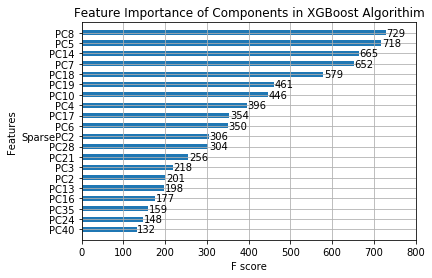

In [368]:
from xgboost import plot_importance

plot_importance(xgb_class, max_num_features= 20, title = 'Feature Importance of Components in XGBoost Algorithim',
               height = 0.5) 
pyplot.show()


In [363]:
a2[-1:-50]

array([], dtype=float32)

In [211]:
print("KNN Models " + str(datetime.datetime.now()))
model_knn(X_traindf2, y_train_weighted2, X_testdf2, y_test_weighted2)
model_knn(X_traindf2.iloc[:,-5:-2], y_train_weighted2, X_testdf2.iloc[:,-5:-2], y_test_weighted2)
model_knn(X_traindf2.iloc[:,-2:], y_train_weighted2, X_testdf2.iloc[:,-2:], y_test_weighted2)

print("RF Models " + str(datetime.datetime.now()))

model_rf(X_traindf2, y_train_weighted2, X_testdf2, y_test_weighted2)
model_rf(X_traindf2.iloc[:,-5:-2], y_train_weighted2, X_testdf2.iloc[:,-5:-2], y_test_weighted2)
model_rf(X_traindf2.iloc[:,-2:], y_train_weighted2, X_testdf2.iloc[:,-2:], y_test_weighted2)

print("Gradient Boost Models " + str(datetime.datetime.now()))

model_gradboost(X_traindf2, y_train_weighted2, X_testdf2, y_test_weighted2)
model_gradboost(X_traindf2.iloc[:,-5:-2], y_train_weighted2, X_testdf2.iloc[:,-5:-2], y_test_weighted2)
model_gradboost(X_traindf2.iloc[:,-2:], y_train_weighted2, X_testdf2.iloc[:,-2:], y_test_weighted2)

print("XGBoost Models " + str(datetime.datetime.now()))

model_xgboost(X_traindf2, y_train_weighted2, X_testdf2, y_test_weighted2)
model_xgboost(X_traindf2.iloc[:,-5:-2], y_train_weighted2, X_testdf2.iloc[:,-5:-2], y_test_weighted2)
model_xgboost(X_traindf2.iloc[:,-2:], y_train_weighted2, X_testdf2.iloc[:,-2:], y_test_weighted2)

print("Done at: " + str(datetime.datetime.now()))

KNN Models 2019-12-15 14:08:59.779134


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.2665


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.2517


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.2085
RF Models 2019-12-15 14:21:31.448285


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.39905


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.2617


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.21325
Gradient Boost Models 2019-12-15 14:24:51.481082


C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.41785


C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.25675


C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2047
XGBoost Models 2019-12-15 15:00:26.642974


C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.42175


C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2563


C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2023
Done at: 2019-12-15 16:03:50.480975


In [213]:
max(f1score)

0.4231

## Text Blob and Vader Sentiment Analysis

In [21]:
import re
from textblob import TextBlob 
from textblob.sentiments import NaiveBayesAnalyzer 

In [35]:
# Storing polarity and subjectivity in lists
polarity = []
subj = []
for i in sample_reviews:
    test = TextBlob(i) 
    obj = test.sentiment
    polarity.append(obj[0])
    subj.append(obj[1])


In [42]:
textsentdf = pd.DataFrame({"Reviews": sample_reviews, "Polarity": polarity, "Subjectivity" : subj, "Class": y['Class']})

textsentdf.head()

textsentdf.to_csv("TextBlobScores.csv")

In [271]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [286]:
neg = []
neu = []
pos = []
compound = []

analyzer = SentimentIntensityAnalyzer()
for review in sample_reviews:
    vs = analyzer.polarity_scores(review)
    for k, v in vs.items():
        if k == 'neg':
            neg.append(v)
        elif k == 'neu':
            neu.append(v)
        elif k == 'pos':
            pos.append(v)
        elif k == 'compound':
            compound.append(v)
  

In [287]:
vadersentdf = pd.DataFrame({"Reviews": sample_reviews, "Neg_score": neg, "Neu_score" : neu, "Pos_score": pos, 
                            "Com_score": compound, "Class": y['Class']})

vadersentdf.head()

vadersentdf.to_csv("VaderSentScore.csv")

In [269]:
textsentdf= pd.read_csv("TextBlobScores.csv")

# vadersentdf = pd.read_csv("VaderSentScore.csv")

textsentdf.head()

Unnamed: 0                                            Reviews  Polarity  \
0           0  It was a fun story, good timing, funny allusio...  0.350000   
1           1  Entire truck including the bed is blue. Silver...  0.086667   
2           2  This book is just a bunch of papers about plan... -0.080000   
3           3  its nice to learn how some logos are developed...  0.300000   
4           4  This is one of the funniest games I haver play... -0.111458   

   Subjectivity  Class  
0      0.533333      4  
1      0.451667      3  
2      0.520000      2  
3      0.500000      3  
4      0.434375      5

## Unsupervised Learning and Comparing to the Ground Truth

#### For simplicity sakes, we'll be doing our straight-faced test by looking at the polarity score and assigning it a "prediction"--
#### -1 to -0.6 is a 1, -0.6 to -0.2 is a 2, -0.2 to 0.2 is a 3, 0.2 to 0.6 is a 4, and 0.6 to 1 is a 5

In [272]:
## Defining function to look at polarity score and give it a review from 1-5 
def class_map(x): 
    if x <= -0.6:
        return 1
    
    elif -0.6 < x <= -0.2:
        return 2 
    
    elif -0.2 < x <= 0.2:
        return 3
    
    elif 0.2 < x <= 0.6:
        return 4
    else:
        return 5

In [273]:
## Same as above, but for only three classes
def class_map2(x): 
    if x <= -0.333337:
        return "Bad"
    
    elif -0.333337 < x <= 0.333337:
        return "Neutral"

    else:
        return "Good"

In [274]:
## Mapping Class 1-5 to a tertiary classification
def class_map3(x): 
    if x == 1:
        return "Bad"
    
    elif x == 2:
        return "Bad"
    
    elif x == 3:
        return "Neutral"

    else:
        return "Good"

In [275]:
textsentdf["y_pred"] = textsentdf['Polarity'].map(class_map)
textsentdf['y_pred2'] = textsentdf['Polarity'].map(class_map2)
textsentdf['Class2'] = textsentdf['Class'].map(class_map3)

textsentdf.head()

Unnamed: 0                                            Reviews  Polarity  \
0           0  It was a fun story, good timing, funny allusio...  0.350000   
1           1  Entire truck including the bed is blue. Silver...  0.086667   
2           2  This book is just a bunch of papers about plan... -0.080000   
3           3  its nice to learn how some logos are developed...  0.300000   
4           4  This is one of the funniest games I haver play... -0.111458   

   Subjectivity  Class  y_pred  y_pred2   Class2  
0      0.533333      4       4     Good     Good  
1      0.451667      3       3  Neutral  Neutral  
2      0.520000      2       3  Neutral      Bad  
3      0.500000      3       4  Neutral  Neutral  
4      0.434375      5       3  Neutral     Good

Text(0.5, 1.0, 'Comparing Polarity with Class')

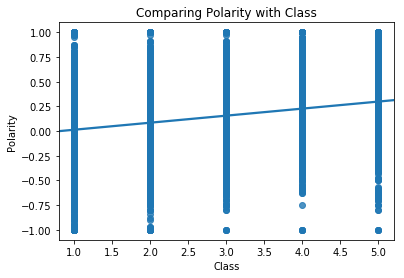

In [410]:
### Attempting to visualize above
sns.regplot(data= textsentdf, x= 'Class', y = 'Polarity')
plt.title("Comparing Polarity with Class")

In [276]:
## Analyzing Actual vs. Predicted
pd.crosstab(textsentdf['Class'], textsentdf['y_pred'], rownames =['Actual'],
            colnames = ['Prediction'], margins = True, margins_name = "Total")

Prediction    1     2      3      4     5   Total
Actual                                           
1           287  2432  14292   2876   130   20017
2            70  1041  14134   4448   135   19828
3            24   435  11853   7356   261   19929
4            11   168   8746  10440   673   20038
5            26   143   6508  12117  1394   20188
Total       418  4219  55533  37237  2593  100000

In [278]:
## Same as above, but as percentages
pd.crosstab(textsentdf['Class'], textsentdf['y_pred'], rownames =['Actual'],
            colnames = ['Prediction'], margins = True, margins_name = "Total", normalize='index')

Prediction         1         2         3         4         5
Actual                                                      
1           0.014338  0.121497  0.713993  0.143678  0.006494
2           0.003530  0.052502  0.712830  0.224329  0.006809
3           0.001204  0.021827  0.594761  0.369110  0.013096
4           0.000549  0.008384  0.436471  0.521010  0.033586
5           0.001288  0.007083  0.322370  0.600208  0.069051
Total       0.004180  0.042190  0.555330  0.372370  0.025930

In [279]:
pd.crosstab(textsentdf['Class2'], textsentdf['y_pred2'], rownames =['Actual'],
            colnames = ['Prediction'], margins = True, margins_name = "Total")

Prediction   Bad   Good  Neutral   Total
Actual                                  
Bad         1583   2386    35876   39845
Good         114  12761    27351   40226
Neutral      146   2792    16991   19929
Total       1843  17939    80218  100000

In [280]:
##Same as above, but as percentages
pd.crosstab(textsentdf['Class2'], textsentdf['y_pred2'], rownames =['Actual'],
            colnames = ['Prediction'], margins = True, margins_name = "Total", normalize='index')

Prediction       Bad      Good   Neutral
Actual                                  
Bad         0.039729  0.059882  0.900389
Good        0.002834  0.317233  0.679933
Neutral     0.007326  0.140097  0.852577
Total       0.018430  0.179390  0.802180

In [281]:
##
from sklearn.metrics import confusion_matrix

print(confusion_matrix(textsentdf['Class'] , textsentdf['y_pred']))



[[  287  2432 14292  2876   130]
 [   70  1041 14134  4448   135]
 [   24   435 11853  7356   261]
 [   11   168  8746 10440   673]
 [   26   143  6508 12117  1394]]


In [288]:
## Doing the same for the vader sentiment analysis

vadersentdf.head()

Reviews  Neg_score  Neu_score  \
0  It was a fun story, good timing, funny allusio...      0.000      0.667   
1  Entire truck including the bed is blue. Silver...      0.109      0.891   
2  This book is just a bunch of papers about plan...      0.097      0.903   
3  its nice to learn how some logos are developed...      0.000      0.928   
4  This is one of the funniest games I haver play...      0.000      0.825   

   Pos_score  Com_score  Class  
0      0.333     0.9324      4  
1      0.000    -0.3252      3  
2      0.000    -0.4767      2  
3      0.072     0.4215      3  
4      0.175     0.9062      5

In [291]:
vadersentdf["y_pred"] = vadersentdf['Com_score'].map(class_map)
vadersentdf['y_pred2'] = vadersentdf['Com_score'].map(class_map2)
vadersentdf['Class2'] = vadersentdf['Class'].map(class_map3)

vadersentdf.head()

Reviews  Neg_score  Neu_score  \
0  It was a fun story, good timing, funny allusio...      0.000      0.667   
1  Entire truck including the bed is blue. Silver...      0.109      0.891   
2  This book is just a bunch of papers about plan...      0.097      0.903   
3  its nice to learn how some logos are developed...      0.000      0.928   
4  This is one of the funniest games I haver play...      0.000      0.825   

   Pos_score  Com_score  Class  y_pred  y_pred2   Class2  
0      0.333     0.9324      4       5     Good     Good  
1      0.000    -0.3252      3       2  Neutral  Neutral  
2      0.000    -0.4767      2       2      Bad      Bad  
3      0.072     0.4215      3       4     Good  Neutral  
4      0.175     0.9062      5       5     Good     Good

Text(0.5, 1.0, 'Comparing Compound Score with Class')

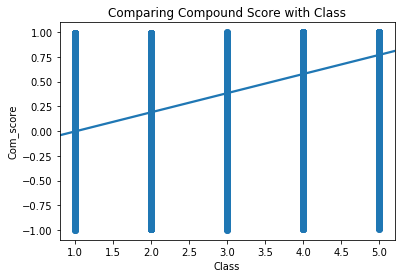

In [412]:
### Attempting to visualize above
sns.regplot(data= vadersentdf, x= 'Class', y = 'Com_score')
plt.title("Comparing Compound Score with Class")

In [ ]:
sns.scatterplot(x = vadersentdf.Com_score, y = textsentdf.Polarity, hue = )

In [292]:
print(pd.crosstab(vadersentdf['Class'], vadersentdf['y_pred'], rownames =['Actual'],
            colnames = ['Prediction'], margins = True, margins_name = "Total"))

pd.crosstab(vadersentdf['Class'], vadersentdf['y_pred'], rownames =['Actual'],
            colnames = ['Prediction'], margins = True, margins_name = "Total", normalize='index')

Prediction      1      2     3      4      5   Total
Actual                                              
1            5578   3629  2714   3170   4926   20017
2            3358   2957  2602   3461   7450   19828
3            1708   1924  2175   3521  10601   19929
4             801    927  1251   2646  14413   20038
5             499    626   913   2195  15955   20188
Total       11944  10063  9655  14993  53345  100000


Prediction         1         2         3         4         5
Actual                                                      
1           0.278663  0.181296  0.135585  0.158365  0.246091
2           0.169356  0.149133  0.131229  0.174551  0.375731
3           0.085704  0.096543  0.109137  0.176677  0.531938
4           0.039974  0.046262  0.062431  0.132049  0.719283
5           0.024718  0.031009  0.045225  0.108728  0.790321
Total       0.119440  0.100630  0.096550  0.149930  0.533450

In [293]:
print(pd.crosstab(vadersentdf['Class2'], vadersentdf['y_pred2'], rownames =['Actual'],
            colnames = ['Prediction'], margins = True, margins_name = "Total"))

pd.crosstab(vadersentdf['Class2'], vadersentdf['y_pred2'], rownames =['Actual'],
            colnames = ['Prediction'], margins = True, margins_name = "Total", normalize='index')

Prediction    Bad   Good  Neutral   Total
Actual                                   
Bad         13613  17098     9134   39845
Good         2317  34189     3720   40226
Neutral      2984  13208     3737   19929
Total       18914  64495    16591  100000


Prediction       Bad      Good   Neutral
Actual                                  
Bad         0.341649  0.429113  0.229238
Good        0.057600  0.849923  0.092478
Neutral     0.149732  0.662753  0.187516
Total       0.189140  0.644950  0.165910

In [419]:
nvadersentdf = vadersentdf.sort_values(by = 'Class')
nvadersentdf.head()

ntextsentdf = textsentdf.sort_values(by = 'Class')
ntextsentdf.head()

Unnamed: 0                                            Reviews  \
88408       88408  This is the worst product for the computer rou...   
87616       87616  Is this a joke? Just look @ the track list. Th...   
55591       55591  This is like those "tutorials" you find for co...   
55592       55592  This book glorifies violence and Christianity....   
55593       55593  Rob Zombie imitates gory B level, drive-in hor...   

       Polarity  Subjectivity  Class  y_pred  y_pred2 Class2  
88408 -0.029167      0.554167      1       3  Neutral    Bad  
87616  0.092403      0.377792      1       3  Neutral    Bad  
55591  0.236806      0.525000      1       4  Neutral    Bad  
55592 -0.625000      0.500000      1       1      Bad    Bad  
55593 -0.178788      0.600568      1       3  Neutral    Bad

Text(0, 0.5, 'TextBlob Polarity Score')

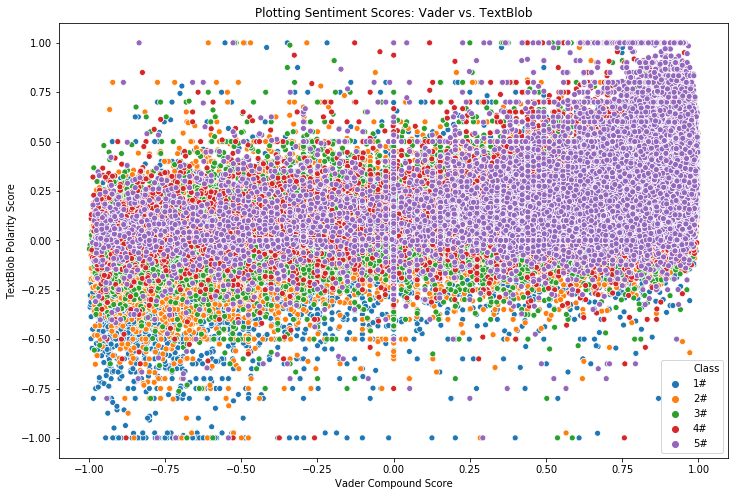

In [422]:
##Plotting the two different score against each other
fig, ax = plt.subplots(1, figsize=(12, 8))
sns.scatterplot(x= nvadersentdf['Com_score'], y = ntextsentdf['Polarity'], hue = nvadersentdf['Class'].astype(str) + '#')
plt.title("Plotting Sentiment Scores: Vader vs. TextBlob")
plt.xlabel("Vader Compound Score")
plt.ylabel("TextBlob Polarity Score")

## Clustering Portion

In [208]:
from sklearn.cluster import KMeans

In [6]:
X_traindfsam = X_traindf.iloc[:, -5:]

In [181]:
X_traindfsam.head()

SparsePC1  SparsePC2  SparsePC3     UMAP1     UMAP2
0  -0.002062   0.000256  -0.000269 -0.578570 -1.082920
1   0.001115   0.004728   0.005817  1.271132  0.574684
2  -0.001898   0.002976  -0.002214 -1.159149 -2.545419
3   0.003825  -0.005416  -0.001575 -0.295066  2.712149
4  -0.003752   0.004213  -0.002489 -2.564374  4.681934

In [209]:
labels = []
for i in range(5,13):
    print(datetime.datetime.now())
    kmeans = KMeans(n_clusters= i, n_jobs=-1)
    kmeans = kmeans.fit(X_traindf)
    labelPCdf = kmeans.labels_
    labels.append(labelPCdf)
    centroids = kmeans.cluster_centers_
    centroids[:, 0]
    print(stats.itemfreq(labelPCdf))

2019-12-16 16:36:32.833076


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # Remove the CWD from sys.path while we load stuff.


[[    0  9565]
 [    1 17354]
 [    2  6008]
 [    3 40699]
 [    4  6374]]
2019-12-16 16:37:15.070495


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # Remove the CWD from sys.path while we load stuff.


[[    0 39688]
 [    1    48]
 [    2  6311]
 [    3 13385]
 [    4 13598]
 [    5  6970]]
2019-12-16 16:38:03.638322


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # Remove the CWD from sys.path while we load stuff.


[[    0  9028]
 [    1  6256]
 [    2   512]
 [    3  5682]
 [    4 38571]
 [    5  8461]
 [    6 11490]]
2019-12-16 16:38:59.172514


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # Remove the CWD from sys.path while we load stuff.


[[    0  9857]
 [    1 24728]
 [    2  4757]
 [    3  6290]
 [    4 20682]
 [    5  7380]
 [    6   621]
 [    7  5685]]
2019-12-16 16:39:58.401482


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # Remove the CWD from sys.path while we load stuff.


[[    0  7230]
 [    1 20498]
 [    2  5774]
 [    3   552]
 [    4 24702]
 [    5  9909]
 [    6   415]
 [    7  4439]
 [    8  6481]]
2019-12-16 16:40:53.540053


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # Remove the CWD from sys.path while we load stuff.


[[    0   972]
 [    1 37511]
 [    2  7193]
 [    3   941]
 [    4  6138]
 [    5 11141]
 [    6  8797]
 [    7  4882]
 [    8  1234]
 [    9  1191]]
2019-12-16 16:41:53.612737


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # Remove the CWD from sys.path while we load stuff.


[[    0  6075]
 [    1 10965]
 [    2  8280]
 [    3   526]
 [    4   711]
 [    5   496]
 [    6   489]
 [    7   538]
 [    8  5377]
 [    9  8994]
 [   10 37549]]
2019-12-16 16:42:58.706076
[[    0   978]
 [    1  6807]
 [    2 37688]
 [    3   878]
 [    4  1238]
 [    5   419]
 [    6  6267]
 [    7   510]
 [    8 11061]
 [    9  2943]
 [   10   472]
 [   11 10739]]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # Remove the CWD from sys.path while we load stuff.


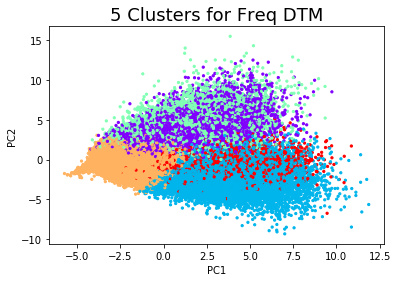

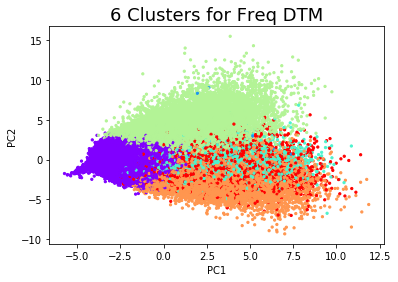

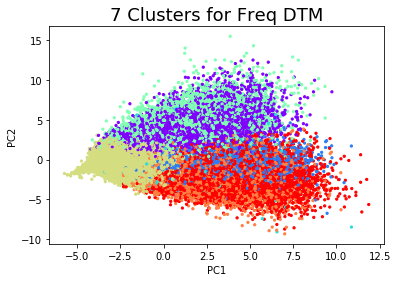

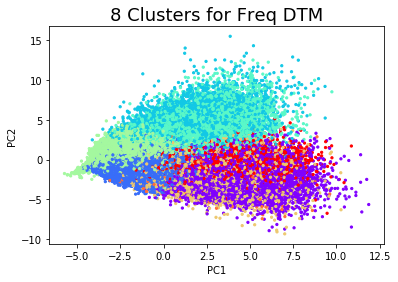

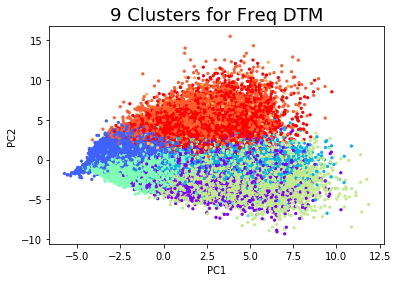

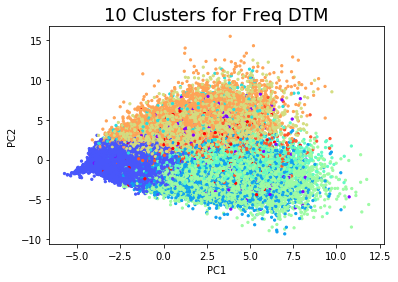

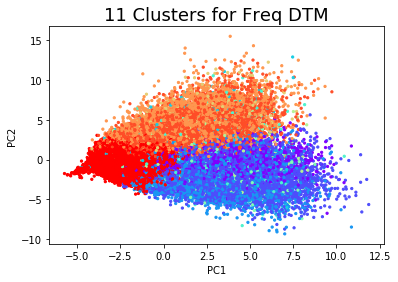

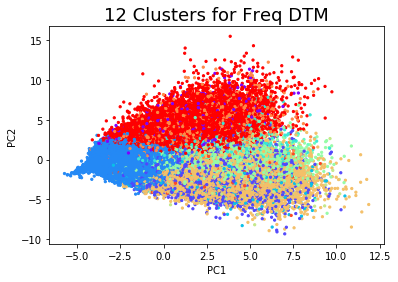

In [210]:
### Graphing Distribution of Clusters for First DTM
for i in range(0,8):
    fig = plt.figure() 
    ax = fig.add_subplot(111) 
    ax.scatter(X_traindf.iloc[:,0],X_traindf.iloc[:,1], c = labels[i], cmap='rainbow', alpha=1, s= 5)  
    plt.title(str(len(set(labels[i]))) + " Clusters for Freq DTM", fontsize=18)
    plt.xlabel("PC1")
    plt.ylabel("PC2")

In [ ]:
y1 = y_train['Class'].tolist()
y1

In [229]:
#Let's go with 6 cluster groups
cluster = labels[1]


X_traindf["Cluster"] = cluster

X_traindf['Class'] = y1

print(X_traindf.head())
X_traindf["Cluster"].value_counts()

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.337354 -0.662678 -0.374577 -1.709115 -0.134480 -0.900876 -1.435159   
1 -0.747898 -2.368735  3.933439  2.355908 -0.482689 -0.888627  1.657136   
2  0.216050 -2.552680 -1.294853 -0.363814 -1.597207 -1.356222  3.086696   
3 -1.743092  4.272727 -0.675675 -1.412320  1.184650 -2.506830  0.596735   
4  1.136095 -3.720031 -1.667688 -2.470774  0.082805 -0.367670  0.703932   

        PC8       PC9      PC10  ...     PC728     PC729     PC730  SparsePC1  \
0  2.332642  0.709165 -2.711734  ... -0.399928 -1.007576 -0.609754  -0.002062   
1 -0.818509  1.191171  0.324173  ...  0.364551  0.798777 -0.115688   0.001115   
2 -0.721210  2.218889 -0.190789  ... -1.310063  2.128878  0.221557  -0.001898   
3 -1.173108 -1.584956  0.194646  ... -0.517248 -0.880590  1.333398   0.003825   
4 -3.271352  1.934532  1.258734  ...  0.296922 -0.709434  0.004898  -0.003752   

   SparsePC2  SparsePC3     UMAP1     UMAP2  Cluster  Class  


0    39688
4    13598
3    13385
5     6970
2     6311
1       48
Name: Cluster, dtype: int64

Text(0.5, 1.0, 'Distribution of Classes in Each Freq. DTM Cluster (6 Clusters)')

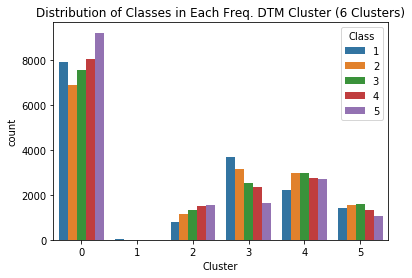

In [252]:
##Graphing Cluster Distribution
ax = sns.countplot(x="Cluster", hue="Class", data=X_traindf)
plt.title("Distribution of Classes in Each Freq. DTM Cluster (6 Clusters)")

In [233]:
##Trying with another to see if clusters are stable
cluster = labels[2]


X_traindf["Cluster2"] = cluster

print(X_traindf.head())
X_traindf["Cluster2"].value_counts()

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.337354 -0.662678 -0.374577 -1.709115 -0.134480 -0.900876 -1.435159   
1 -0.747898 -2.368735  3.933439  2.355908 -0.482689 -0.888627  1.657136   
2  0.216050 -2.552680 -1.294853 -0.363814 -1.597207 -1.356222  3.086696   
3 -1.743092  4.272727 -0.675675 -1.412320  1.184650 -2.506830  0.596735   
4  1.136095 -3.720031 -1.667688 -2.470774  0.082805 -0.367670  0.703932   

        PC8       PC9      PC10  ...     PC729     PC730  SparsePC1  \
0  2.332642  0.709165 -2.711734  ... -1.007576 -0.609754  -0.002062   
1 -0.818509  1.191171  0.324173  ...  0.798777 -0.115688   0.001115   
2 -0.721210  2.218889 -0.190789  ...  2.128878  0.221557  -0.001898   
3 -1.173108 -1.584956  0.194646  ... -0.880590  1.333398   0.003825   
4 -3.271352  1.934532  1.258734  ... -0.709434  0.004898  -0.003752   

   SparsePC2  SparsePC3     UMAP1     UMAP2  Cluster  Class  Cluster2  
0   0.000256  -0.000269 -0.578570 -1.082920       

4    38571
6    11490
0     9028
5     8461
1     6256
3     5682
2      512
Name: Cluster2, dtype: int64

Text(0.5, 1.0, 'Distribution of Classes in Each Freq. DTM Cluster (7 Clusters)')

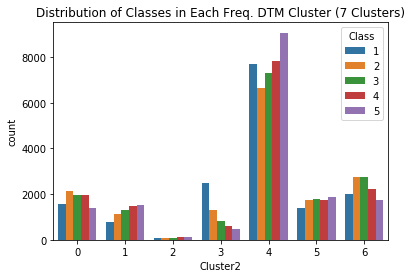

In [251]:
##Graphing Cluster Distribution
ax = sns.countplot(x="Cluster2", hue="Class", data=X_traindf)
plt.title("Distribution of Classes in Each Freq. DTM Cluster (7 Clusters)")

In [341]:
## Looking for any differences in averages of ratings in clusters
print(X_traindf.groupby('Cluster')['Class'].mean())

X_traindfn = X_traindf.groupby('Cluster2')['Class'].mean()
X_traindfn

Cluster
0    3.095419
1    2.104167
2    3.297417
3    2.630183
4    3.056111
5    2.866141
Name: Class, dtype: float64


Cluster2
0    2.946832
1    3.300831
2    3.162109
3    2.164027
4    3.101501
5    3.116180
6    2.901480
Name: Class, dtype: float64

In [211]:
labels1 = []
for i in range(5,13):
    print(datetime.datetime.now())
    kmeans = KMeans(n_clusters= i, n_jobs=-1)
    kmeans = kmeans.fit(X_traindf1)
    labelPCdf = kmeans.labels_
    labels1.append(labelPCdf)
    centroids = kmeans.cluster_centers_
    centroids[:, 0]
    print(stats.itemfreq(labelPCdf))

2019-12-16 16:44:27.295219


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # Remove the CWD from sys.path while we load stuff.


[[    0 20634]
 [    1 14925]
 [    2 13614]
 [    3 17249]
 [    4 13578]]
2019-12-16 16:45:24.284838


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # Remove the CWD from sys.path while we load stuff.


[[    0 14470]
 [    1 11737]
 [    2 11980]
 [    3 10634]
 [    4 11804]
 [    5 19375]]
2019-12-16 16:46:17.708878


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # Remove the CWD from sys.path while we load stuff.


[[    0 13526]
 [    1 12759]
 [    2 14732]
 [    3 17293]
 [    4 20292]
 [    5   507]
 [    6   891]]
2019-12-16 16:47:24.853952


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # Remove the CWD from sys.path while we load stuff.


[[    0   674]
 [    1 17841]
 [    2 11485]
 [    3  4714]
 [    4 13767]
 [    5 11090]
 [    6 10316]
 [    7 10113]]
2019-12-16 16:48:29.587620


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # Remove the CWD from sys.path while we load stuff.


[[    0 10608]
 [    1 11045]
 [    2 13807]
 [    3 10184]
 [    4  9694]
 [    5   419]
 [    6 10921]
 [    7 12743]
 [    8   579]]
2019-12-16 16:49:35.983628


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # Remove the CWD from sys.path while we load stuff.


[[    0   385]
 [    1 11559]
 [    2  9697]
 [    3 12127]
 [    4  8879]
 [    5  1307]
 [    6  9492]
 [    7 10702]
 [    8 11171]
 [    9  4681]]
2019-12-16 16:50:47.634612


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # Remove the CWD from sys.path while we load stuff.


[[    0   506]
 [    1  2760]
 [    2   715]
 [    3   505]
 [    4   561]
 [    5 17400]
 [    6 12069]
 [    7 14416]
 [    8 10984]
 [    9 10277]
 [   10  9807]]
2019-12-16 16:51:46.666049
[[    0 10340]
 [    1  1205]
 [    2 12217]
 [    3   391]
 [    4  8914]
 [    5   911]
 [    6  8710]
 [    7  4660]
 [    8   475]
 [    9 11200]
 [   10 11104]
 [   11  9873]]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # Remove the CWD from sys.path while we load stuff.


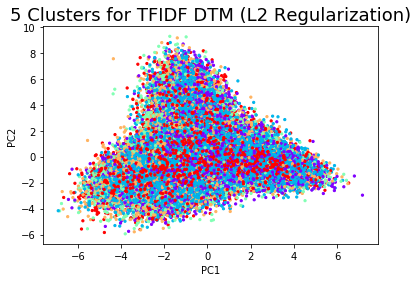

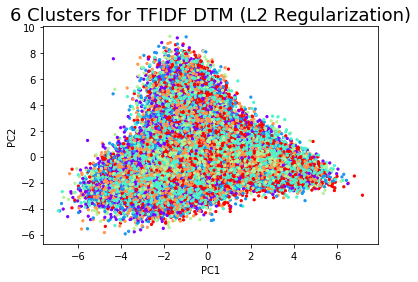

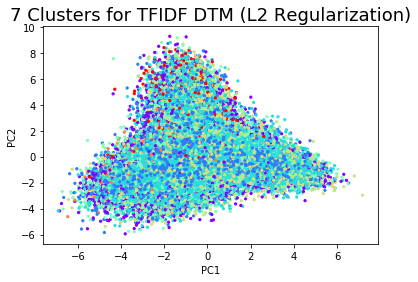

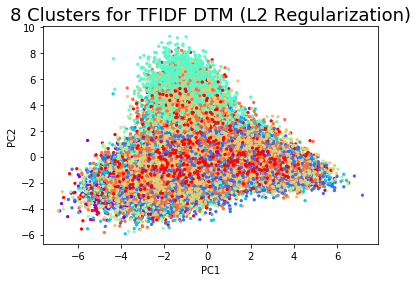

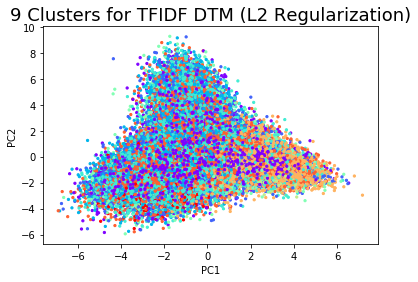

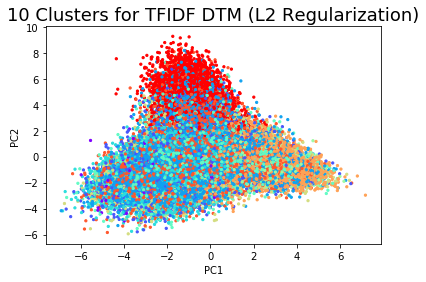

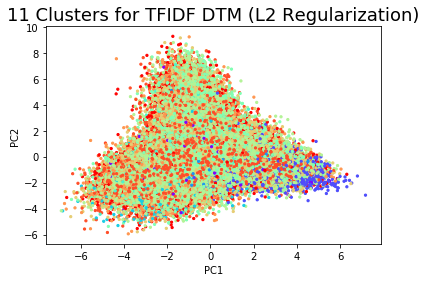

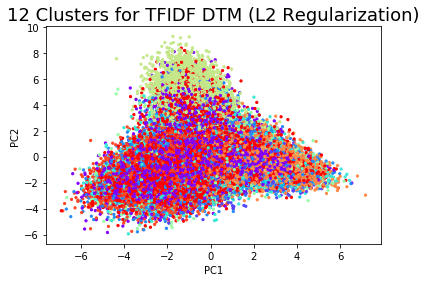

In [212]:
### Graphing Distribution of Clusters for First DTM
for i in range(0,8):
    fig = plt.figure() 
    ax = fig.add_subplot(111) 
    ax.scatter(X_traindf1.iloc[:,0],X_traindf1.iloc[:,1], c = labels1[i], cmap='rainbow', alpha=1, s= 5)  
    plt.title(str(len(set(labels1[i]))) + " Clusters for TFIDF DTM (L2 Regularization)", fontsize=18)
    plt.xlabel("PC1")
    plt.ylabel("PC2")

In [238]:
#Let's go with 6 cluster groups
y1 = y_train_weighted['Class'].tolist()
cluster = labels[1]


X_traindf1["Cluster"] = cluster

X_traindf1['Class'] = y1

print(X_traindf1.head())
X_traindf1["Cluster"].value_counts()

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.230632 -0.323241 -1.785005  0.751073 -1.487858  0.324125 -0.949820   
1 -1.861304  4.526425  2.818836 -0.976210  0.060766  1.087254  1.739644   
2 -2.969396 -1.489410 -0.012056 -2.092047 -0.613592  1.707702  3.709825   
3  4.533328 -0.900079 -1.356452  0.753011  0.991597  2.500428  0.514168   
4 -4.495265 -1.874993 -2.605861 -0.194787 -0.303658 -0.081268  2.666941   

        PC8       PC9      PC10  ...     PC740     PC741     PC742  SparsePC1  \
0  2.799858  2.371894 -1.896609  ... -1.122801 -0.792794 -1.370207  -0.002003   
1 -0.740417 -1.218094 -0.639302  ...  0.775463 -0.161328 -0.277326  -0.002895   
2  0.240688 -0.269498 -2.036067  ...  0.159404 -0.646215  2.634586  -0.004826   
3 -1.745084  0.615501  0.334689  ... -1.073751 -0.232951  0.321047   0.007190   
4 -2.140825 -2.183555 -1.075806  ... -1.469740 -1.092086 -0.257695  -0.007490   

   SparsePC2  SparsePC3     UMAP1     UMAP2  Cluster  Class  


0    39688
4    13598
3    13385
5     6970
2     6311
1       48
Name: Cluster, dtype: int64

Text(0.5, 1.0, 'Distribution of Classes in Each TFIDF(L2) DTM Cluster (6 Clusters)')

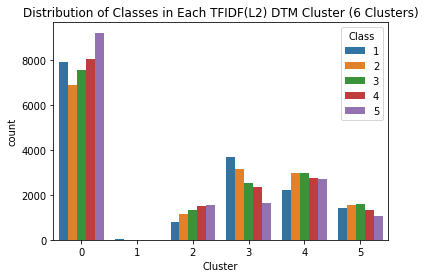

In [250]:
##Graphing Cluster Distribution
ax = sns.countplot(x="Cluster", hue="Class", data=X_traindf1)
plt.title("Distribution of Classes in Each TFIDF(L2) DTM Cluster (6 Clusters)")

In [242]:
##Trying with another to see if clusters are stable
cluster = labels[2]


X_traindf1["Cluster2"] = cluster


X_traindf1["Cluster2"].value_counts()

4    38571
6    11490
0     9028
5     8461
1     6256
3     5682
2      512
Name: Cluster2, dtype: int64

Text(0.5, 1.0, 'Distribution of Classes in Each TFIDF(L2) DTM Cluster (7 Clusters)')

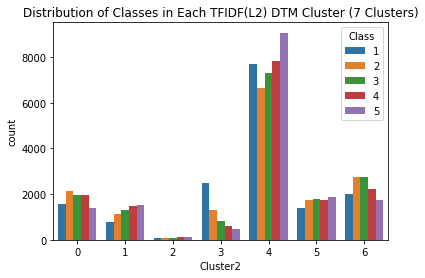

In [249]:
##Graphing Cluster Distribution
ax = sns.countplot(x="Cluster2", hue="Class", data=X_traindf1)
plt.title("Distribution of Classes in Each TFIDF(L2) DTM Cluster (7 Clusters)")

In [255]:
## Looking for any differences in averages
print(X_traindf1.groupby('Cluster')['Class'].mean())

X_traindf1.groupby('Cluster2')['Class'].mean()

Cluster
0    3.095419
1    2.104167
2    3.297417
3    2.630183
4    3.056111
5    2.866141
Name: Class, dtype: float64


Cluster2
0    2.946832
1    3.300831
2    3.162109
3    2.164027
4    3.101501
5    3.116180
6    2.901480
Name: Class, dtype: float64

In [213]:
labels2 = []
for i in range(5,13):
    print(datetime.datetime.now())
    kmeans = KMeans(n_clusters= i, n_jobs=-1)
    kmeans = kmeans.fit(X_traindf2)
    labelPCdf = kmeans.labels_
    labels2.append(labelPCdf)
    centroids = kmeans.cluster_centers_
    centroids[:, 0]
    print(stats.itemfreq(labelPCdf))

2019-12-16 16:53:32.699833


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # Remove the CWD from sys.path while we load stuff.


[[    0   681]
 [    1 20840]
 [    2 18316]
 [    3 20562]
 [    4 19601]]
2019-12-16 16:54:22.112310


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # Remove the CWD from sys.path while we load stuff.


[[    0  3303]
 [    1 14271]
 [    2 16012]
 [    3 16642]
 [    4 14788]
 [    5 14984]]
2019-12-16 16:55:23.364926


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # Remove the CWD from sys.path while we load stuff.


[[    0  5105]
 [    1 19216]
 [    2  1031]
 [    3 18872]
 [    4 18576]
 [    5  1048]
 [    6 16152]]
2019-12-16 16:56:23.214242


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # Remove the CWD from sys.path while we load stuff.


[[    0  4899]
 [    1 14455]
 [    2 12644]
 [    3   203]
 [    4 14041]
 [    5  3391]
 [    6 14305]
 [    7 16062]]
2019-12-16 16:57:22.930276


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # Remove the CWD from sys.path while we load stuff.


[[    0 15020]
 [    1 17276]
 [    2   396]
 [    3 16561]
 [    4 14544]
 [    5   309]
 [    6 15402]
 [    7   120]
 [    8   372]]
2019-12-16 16:58:20.317068


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # Remove the CWD from sys.path while we load stuff.


[[    0   970]
 [    1 12050]
 [    2   509]
 [    3 12391]
 [    4   120]
 [    5 11980]
 [    6 11464]
 [    7 13506]
 [    8 12429]
 [    9  4581]]
2019-12-16 16:59:41.146382


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # Remove the CWD from sys.path while we load stuff.


[[    0   677]
 [    1  8900]
 [    2   301]
 [    3 12935]
 [    4 13555]
 [    5   650]
 [    6  4853]
 [    7   404]
 [    8 13878]
 [    9  9873]
 [   10 13974]]
2019-12-16 17:00:50.644394
[[    0 12184]
 [    1  8791]
 [    2   257]
 [    3  1029]
 [    4 13226]
 [    5   709]
 [    6  9737]
 [    7  1209]
 [    8   557]
 [    9 13325]
 [   10  4866]
 [   11 14110]]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # Remove the CWD from sys.path while we load stuff.


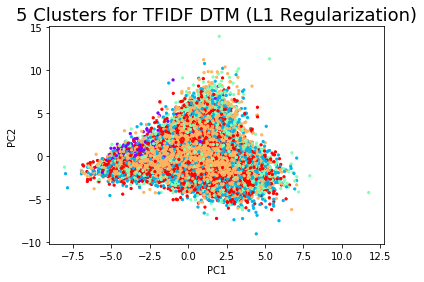

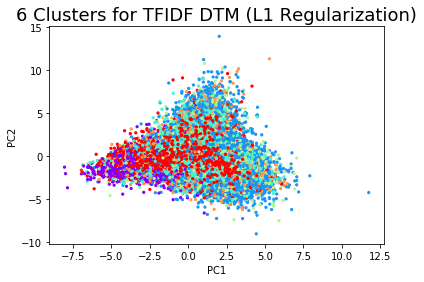

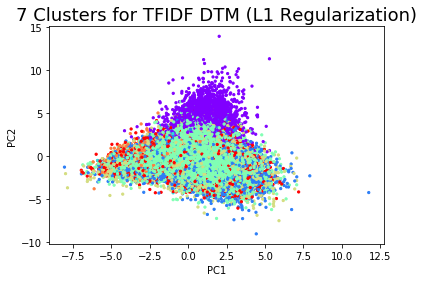

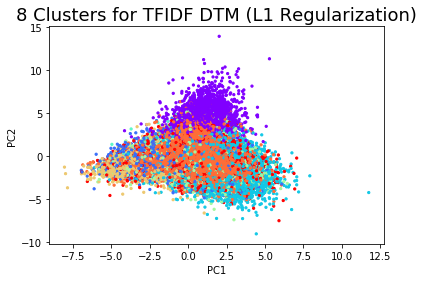

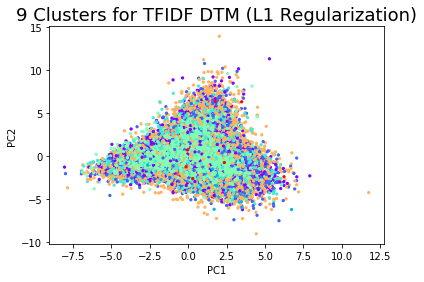

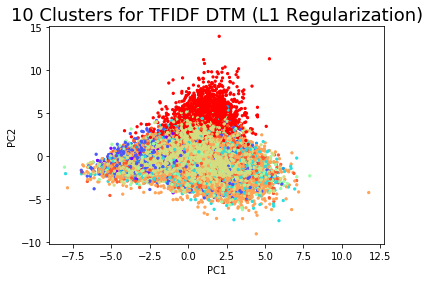

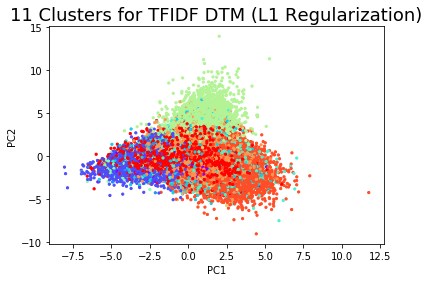

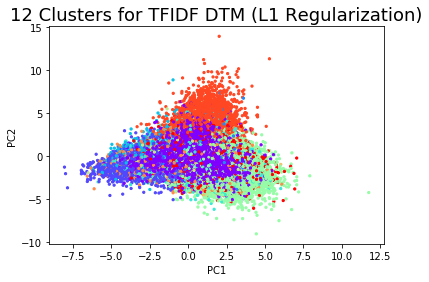

In [214]:
### Graphing Distribution of Clusters for Second DTM
for i in range(0,8):
    fig = plt.figure() 
    ax = fig.add_subplot(111) 
    ax.scatter(X_traindf2.iloc[:,0],X_traindf2.iloc[:,1], c = labels2[i], cmap='rainbow', alpha=1, s= 5)  
    plt.title(str(len(set(labels2[i]))) + " Clusters for TFIDF DTM (L1 Regularization)", fontsize=18)
    plt.xlabel("PC1")
    plt.ylabel("PC2")

In [245]:
#Let's go with 6 cluster groups
y1 = y_train_weighted2['Class'].tolist()
cluster = labels[1]
cluster1 = labels[2]

X_traindf2["Cluster"] = cluster
X_traindf2["Cluster2"] = cluster1
X_traindf2['Class'] = y1

X_traindf2["Cluster"].value_counts()

0    39688
4    13598
3    13385
5     6970
2     6311
1       48
Name: Cluster, dtype: int64

Text(0.5, 1.0, 'Distribution of Classes in Each TFIDF(L1) DTM Cluster (6 Clusters)')

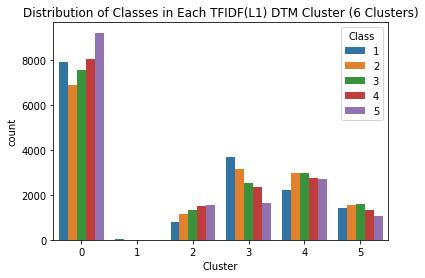

In [248]:
##Graphing Cluster Distribution
ax = sns.countplot(x="Cluster", hue="Class", data=X_traindf2)
plt.title("Distribution of Classes in Each TFIDF(L1) DTM Cluster (6 Clusters)")

Text(0.5, 1.0, 'Distribution of Classes in Each TFIDF(L1) DTM Cluster (7 Clusters)')

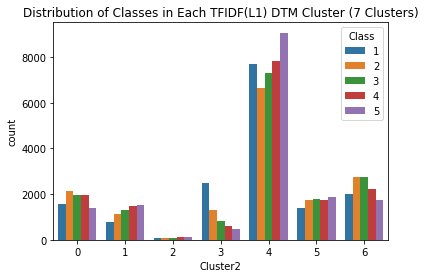

In [247]:
##Graphing Cluster Distribution
ax = sns.countplot(x="Cluster2", hue="Class", data=X_traindf2)
plt.title("Distribution of Classes in Each TFIDF(L1) DTM Cluster (7 Clusters)")

In [256]:
## Looking for any differences in averages
print(X_traindf2.groupby('Cluster')['Class'].mean())

X_traindf2.groupby('Cluster2')['Class'].mean()

Cluster
0    3.095419
1    2.104167
2    3.297417
3    2.630183
4    3.056111
5    2.866141
Name: Class, dtype: float64


Cluster2
0    2.946832
1    3.300831
2    3.162109
3    2.164027
4    3.101501
5    3.116180
6    2.901480
Name: Class, dtype: float64

### HDBCScan

In [160]:
## I was having major troubles with all the columns, HDBSCSN kept saying that it was noise. Electing to examine only the 
## sparse PCA components and UMAP
X_sam =X_traindf.iloc[0:100000, -5:]

X_array = X_sam.values

In [8]:
import hdbscan

In [96]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=300, gen_min_span_tree=True)
print(datetime.datetime.now())
clusterer.fit(X_array)
print(datetime.datetime.now())

2019-12-16 10:18:51.862798
2019-12-16 10:18:56.366069


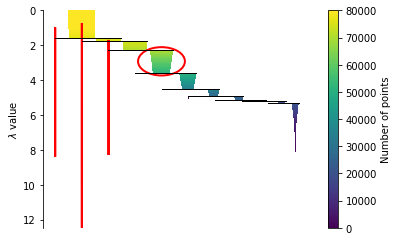

In [369]:
clusterer.condensed_tree_.plot(select_clusters = True)

In [97]:
max(clusterer.labels_)

3

In [149]:
ymap = y_train.Class
type(ymap)

pandas.core.series.Series

In [192]:
X_sam['Cluster_number'] = clusterer.labels_
X_sam.head()

X_sam['Class'] = ycol

X_sam2.head()

SparsePC1  SparsePC2  SparsePC3     UMAP1     UMAP2  Cluster_number  \
39897  -0.003640  -0.008801   0.001500  0.776007  0.764937               3   
13857   0.003371   0.000470  -0.001403  0.856662  0.432015               3   
50187  -0.002457   0.000693   0.001607 -1.304629 -1.918864               3   
50183   0.001183  -0.001656  -0.002796  1.502295  1.878982               3   
29568  -0.005931   0.001978  -0.006124  4.269385  1.160580               3   

       Class  
39897      1  
13857      1  
50187      1  
50183      1  
29568      1

In [183]:
ycol = ycol.sort()
ycol

Text(0.5, 1.0, 'HDBSCAN Clusters with UMAP Components')

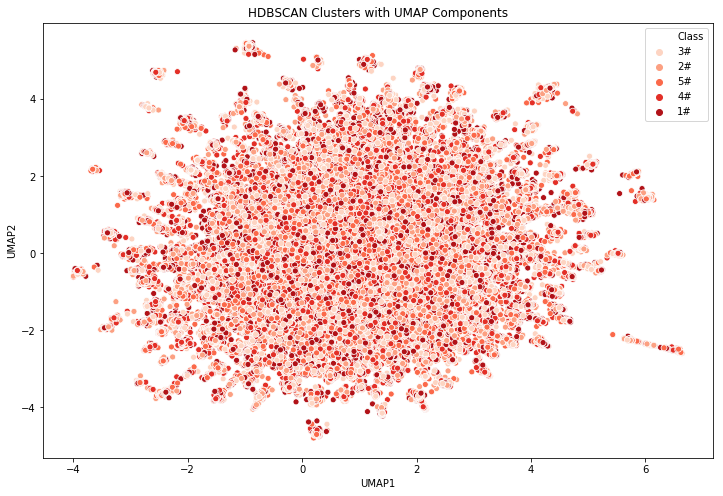

In [346]:
fig, ax = plt.subplots(1, figsize=(12, 8))
sns.scatterplot(x = X_sam2.iloc[:,3], y = X_sam2.iloc[:,4], hue = ymap.astype(str) + '#', palette = "Reds" )

plt.title('HDBSCAN Clusters with UMAP Components')

C:\Users\Jordan\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


Text(0.5, 1.0, 'HDBSCAN Clusters with UMAP Components')

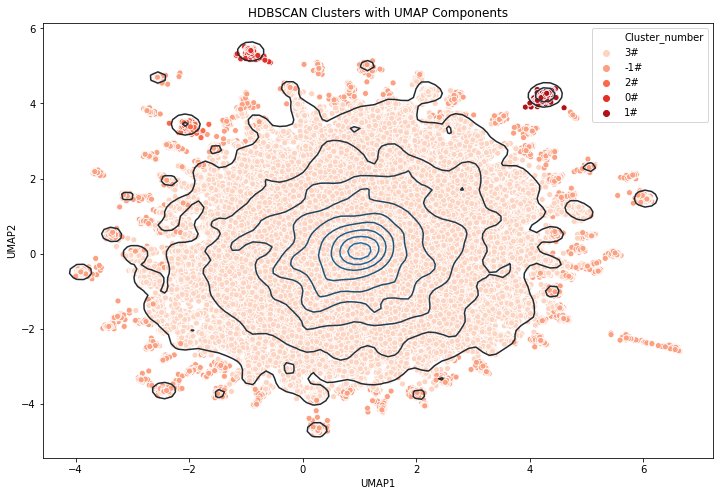

In [373]:
##
fig, ax = plt.subplots(1, figsize=(12, 8))

sns.kdeplot(X_sam2.iloc[:,3:5], ax = ax)
sns.scatterplot(x = X_sam2.iloc[:,3], y = X_sam2.iloc[:,4], hue = X_sam2.iloc[:,-2].astype(str) + '#', palette = "Reds" )

plt.title('HDBSCAN Clusters with UMAP Components')

Text(0.5, 1.0, 'Distribution of Classes in Each Cluster')

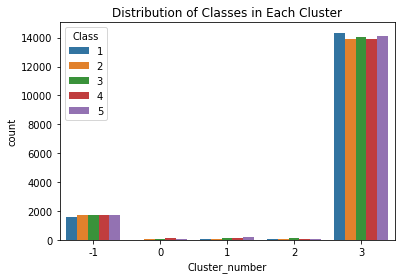

In [235]:
##Graphing Cluster Distribution
ax = sns.countplot(x="Cluster_number", hue="Class", data=X_sam2)
plt.title("Distribution of Classes in Each Cluster")

Text(0.5, 1.0, 'Exploring Cluster Make-ups')

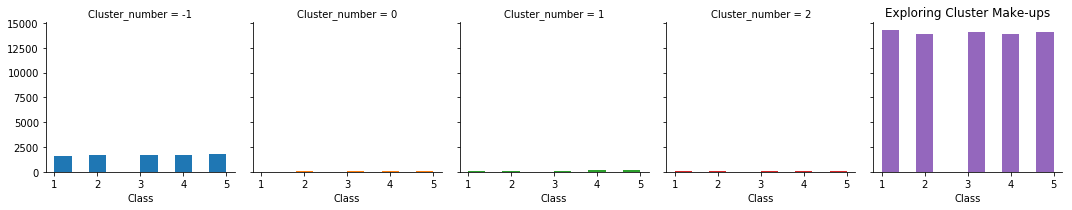

In [345]:
g = sns.FacetGrid(X_sam2, col= "Cluster_number", hue= "Cluster_number")
g = g.map(plt.hist, "Class")
plt.title("Exploring Cluster Make-ups")

In [343]:
## Looking for any differences in averages
print(X_sam2.groupby('Cluster_number')['Class'].mean())


Cluster_number
-1    3.034519
 0    3.605797
 1    3.700758
 2    3.234043
 3    2.993467
Name: Class, dtype: float64


### Attempting to "Cluster" Word Tokens

#### I wasn't able to figure out how to tranpose the tokens and reviews and keep the rating/class associated with the review. Below is my best attempt to see the top unique words for each review class

In [394]:
## Adding rating to the DTM with its associated row
df['Rating'] = sample_y
df.head()

abil  abl  abov  absolut  account  accur  across  act  action  actor  ...  \
0     0    0     0        0        0      0       0    0       0      0  ...   
1     0    0     0        0        0      0       0    0       0      0  ...   
2     0    0     0        0        0      0       0    0       0      0  ...   
3     0    0     0        0        0      0       0    0       0      0  ...   
4     0    0     0        0        0      0       0    0       0      0  ...   

   write  writer  written  wrong  wrote  ye  year  yet  young  Rating  
0      0       0        0      0      0   0     0    0      0       4  
1      0       0        0      0      0   0     0    0      0       3  
2      0       0        0      0      0   0     0    0      0       2  
3      0       0        0      0      0   0     0    0      0       3  
4      0       0        0      0      0   0     0    0      0       5  

[5 rows x 1001 columns]

In [398]:
## Grouping by Rating, then transposing so that the counts of each word appearance in a Class appear
Tdf = df.groupby('Rating').sum().T
Tdf.head()

Rating     1    2    3    4    5
abil      78  139  117  172  166
abl      471  543  497  568  589
abov     130  165  170  156  104
absolut  477  293  216  248  590
account  140  136  111  158  138

In [447]:
## Sorting each column with top occuring word and reseting the index so that the word in fixed in its appropriate place
class_1 = Tdf.sort_values(by = 1, ascending=False).reset_index()
class_2 = Tdf.sort_values(by = 2, ascending=False).reset_index()
class_3 = Tdf.sort_values(by = 3, ascending=False).reset_index()
class_4 = Tdf.sort_values(by = 4, ascending=False).reset_index()
class_5 = Tdf.sort_values(by = 5, ascending=False).reset_index()
class_1.to_csv("Sorted words.csv")

class_1.head(n=20)

Rating    index      1      2      3      4      5
0           thi  30121  27695  24732  25312  27685
1            wa  15758  17906  16181  12048  10301
2           n't  12103  12571  11080   8156   6704
3          book  10268  12410  11668  10735  12069
4           one   7621   7642   7242   6993   7395
5         would   6160   6388   5903   4424   3315
6          like   5929   7260   7793   6986   5488
7           get   5193   5423   5177   4585   3969
8           use   4648   5202   4819   5093   4371
9          time   4626   4472   4182   4179   3956
10         veri   4417   5894   5363   6244   5239
11         work   4391   4029   3687   3619   3081
12         read   4143   4782   4878   5011   5424
13         movi   3995   3674   3940   3220   3168
14          buy   3982   2603   1944   1730   2169
15         onli   3855   3999   3337   3749   2415
16      product   3842   2484   2027   1744   1750
17           ha   3841   4025   4120   4707   4756
18         even   3738   2901   2101   1963   2110
19         good   3419   5231   7206   6959   3970

In [448]:
## Creating lists for the words that are already order with the "top" words occuring first
list1 = class_1['index'].tolist()
list2 = class_2['index'].tolist()
list3 = class_3['index'].tolist()
list4 = class_4['index'].tolist()
list5 = class_5['index'].tolist()

In [456]:
list1

['thi',
 'wa',
 "n't",
 'book',
 'one',
 'would',
 'like',
 'get',
 'use',
 'time',
 'veri',
 'work',
 'read',
 'movi',
 'buy',
 'onli',
 'product',
 'ha',
 'even',
 'good',
 'doe',
 'make',
 'could',
 'money',
 'tri',
 'look',
 'becaus',
 'bought',
 'first',
 'want',
 'hi',
 'go',
 'ani',
 'realli',
 'review',
 'much',
 'back',
 'wast',
 'bad',
 'never',
 'think',
 'thing',
 'year',
 'better',
 'say',
 'got',
 'purchas',
 'know',
 'disappoint',
 'return',
 'great',
 'way',
 'new',
 'made',
 'two',
 'well',
 'see',
 'cd',
 'peopl',
 'order',
 'amazon',
 'dvd',
 'stori',
 'day',
 'give',
 'anoth',
 'ever',
 'also',
 'mani',
 'game',
 'befor',
 'love',
 'need',
 'noth',
 'end',
 'problem',
 'watch',
 'someth',
 'author',
 'sound',
 'put',
 'take',
 'play',
 'album',
 'find',
 'thought',
 'ca',
 'month',
 'old',
 'still',
 'come',
 'charact',
 'recommend',
 'seem',
 'item',
 'music',
 'littl',
 'receiv',
 'whi',
 'film',
 'qualiti',
 'song',
 'start',
 'star',
 'actual',
 'write',
 'worst

In [457]:
list2

['thi',
 'wa',
 "n't",
 'book',
 'one',
 'like',
 'would',
 'veri',
 'get',
 'good',
 'use',
 'read',
 'time',
 'work',
 'ha',
 'onli',
 'much',
 'realli',
 'movi',
 'doe',
 'look',
 'becaus',
 'make',
 'hi',
 'first',
 'could',
 'even',
 'better',
 'great',
 'tri',
 'well',
 'want',
 'buy',
 'go',
 'think',
 'stori',
 'product',
 'disappoint',
 'seem',
 'way',
 'bought',
 'thing',
 'love',
 'ani',
 'also',
 'album',
 'two',
 'year',
 'end',
 'littl',
 'charact',
 'song',
 'know',
 'mani',
 'say',
 'review',
 'got',
 'sound',
 'back',
 'new',
 'see',
 'cd',
 'need',
 'bad',
 'find',
 'found',
 'howev',
 'thought',
 'interest',
 'made',
 'lot',
 'purchas',
 'someth',
 'give',
 'never',
 'play',
 'take',
 'game',
 'come',
 'still',
 'film',
 'author',
 'expect',
 'qualiti',
 'anoth',
 'music',
 'recommend',
 'start',
 'money',
 'old',
 'problem',
 'feel',
 'put',
 'peopl',
 'dvd',
 'star',
 'watch',
 'befor',
 'day',
 'set',
 'last',
 'hope',
 'write',
 'enough',
 'part',
 'best',
 'fan'

In [505]:
## Looping through the other lists a creating a new list without the words in the top 25 of the other lists
topten_1v1 = []

for i in list1:
    if i not in list2[0:25]:
        topten_1v1.append(i)

topten_1v2 = []
for i in topten_1v1:
    if i not in list3[0:25]:
        topten_1v2.append(i)
        
topten_1v3 = []
for i in topten_1v2:
    if i not in list4[0:25]:
        topten_1v3.append(i)
        
topten_1v4 = []
for i in topten_1v3:
    if i not in list5[0:25]:
        topten_1v4.append(i)

In [494]:
topten_1v4

['buy',
 'product',
 'even',
 'could',
 'money',
 'tri',
 'bought',
 'want',
 'go',
 'ani',
 'review',
 'back',
 'wast',
 'bad',
 'never',
 'think',
 'thing',
 'better',
 'say',
 'got',
 'purchas',
 'know',
 'disappoint',
 'return',
 'way',
 'new',
 'made',
 'two',
 'see',
 'cd',
 'peopl',
 'order',
 'amazon',
 'dvd',
 'stori',
 'day',
 'give',
 'anoth',
 'ever',
 'also',
 'mani',
 'game',
 'befor',
 'need',
 'noth',
 'end',
 'problem',
 'watch',
 'someth',
 'author',
 'sound',
 'put',
 'take',
 'play',
 'find',
 'thought',
 'ca',
 'month',
 'old',
 'still',
 'come',
 'charact',
 'recommend',
 'seem',
 'item',
 'music',
 'receiv',
 'whi',
 'film',
 'qualiti',
 'song',
 'start',
 'star',
 'actual',
 'write',
 'worst',
 'found',
 'replac',
 'call',
 'last',
 'complet',
 'part',
 'hope',
 'set',
 'differ',
 'version',
 'right',
 'page',
 'anyth',
 'show',
 'believ',
 'lot',
 'week',
 'everi',
 'feel',
 'worth',
 'turn',
 'away',
 'expect',
 'howev',
 'bore',
 'fan',
 'anyon',
 'without',


In [506]:
topten_2v1 = []

for i in list2:
    if i not in list1[0:25]:
        topten_2v1.append(i)

topten_2v2 = []
for i in topten_2v1:
    if i not in list3[0:25]:
        topten_2v2.append(i)

topten_2v3 = []
for i in topten_2v2:
    if i not in list4[0:25]:
        topten_2v3.append(i)
        
topten_2v4 = []
for i in topten_2v3:
    if i not in list5[0:25]:
        topten_2v4.append(i)

In [507]:
topten_3v1 = []

for i in list3:
    if i not in list1[0:25]:
        topten_3v1.append(i)

topten_3v2 = []
for i in topten_3v1:
    if i not in list2[0:25]:
        topten_3v2.append(i)

topten_3v3 = []
for i in topten_3v2:
    if i not in list4[0:25]:
        topten_3v3.append(i)
        
topten_3v4 = []
for i in topten_3v3:
    if i not in list5[0:25]:
        topten_3v4.append(i)

In [508]:
topten_4v1 = []

for i in list4:
    if i not in list1[0:25]:
        topten_4v1.append(i)

topten_4v2 = []
for i in topten_4v1:
    if i not in list2[0:25]:
        topten_4v2.append(i)

topten_4v3 = []
for i in topten_4v2:
    if i not in list3[0:25]:
        topten_4v3.append(i)
        
topten_4v4 = []
for i in topten_4v3:
    if i not in list5[0:25]:
        topten_4v4.append(i)

In [509]:
topten_5v1 = []

for i in list5:
    if i not in list1[0:25]:
        topten_5v1.append(i)

topten_5v2 = []
for i in topten_5v1:
    if i not in list2[0:25]:
        topten_5v2.append(i)

topten_5v3 = []
for i in topten_5v2:
    if i not in list3[0:25]:
        topten_5v3.append(i)
        
topten_5v4 = []
for i in topten_5v3:
    if i not in list5[0:25]:
        topten_5v4.append(i)

In [510]:
## Creating a dataframe of the top 15 words for each cluster

top_words = pd.DataFrame({'Class_1_words': topten_1v4[0:15], 'Class_2_words': topten_2v4[0:15], 
                          'Class_3_words': topten_3v4[0:15],
                         'Class_4_words': topten_4v4[0:15], 'Class_5_words': topten_5v4[0:15]})

In [511]:
## Top 15 words for each Class that don't occur in the the top 25 of the other classes
top_words

Class_1_words Class_2_words Class_3_words Class_4_words Class_5_words
0            buy         first         stori         littl            cd
1        product        better        better         stori     recommend
2           even          want         think          song          song
3          could            go          song          also         music
4          money         think          want         think          also
5            tri         stori            go         enjoy         stori
6         bought    disappoint         howev            cd          want
7           want          seem          also          want            go
8             go           way          seem         still          mani
9            ani        bought         still            go           ani
10        review         thing           way           way         think
11          back           ani           end     recommend           new
12          wast          also            cd         music           way
13           bad           two         thing         thing          know
14         never           end          know        better         enjoy